#### Unusual Datatypes
<table>
<tr>
<th>Variable Name</th>
<th>Current Datatype</th>
<th>Desired Datatype</th>
</tr>
<tr>
<td>HATCH</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>WAGON</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>UTE</td>
<td>Object</td>
<td>int64</td>
</tr>
<tr>
<td>K_SALES_TOT </td>
<td>Object</td>
<td>int64</td>
</tr>
</table>
     
For the given data description, the fields `UTE`, `HATCH`,`SEDAN`, `WAG0N` and `K_SALES_TOT` should be interval/numerical values as opposed to objects.
By using the `.describe()` function, we may be able to uncover the source of the issues in the dataset

# IFN645 Case Study 2
## Mining from Manufacturing, Supermarket, News Stories and Web Log Data

### Contents
1. [Clustering & Pre-processing](#clust)
2. [Association Mining](#association)
3. [Text Mining](#text)
4. [Web Mining](#web)

---
## Part 1: Clustering Pre-processing and K-means analysis<a name="clust"></a>

In [1]:
# Libraries Required for this section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Import Data for this section from csv (without skipping empty cells)
df = pd.read_csv('Casestudy2-Data-Py/model_car_sales.csv', na_filter=False)

# Get details about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
LOCATION_NUMBER    675 non-null int64
REPORT_DATE        675 non-null object
DEALER_CODE        675 non-null object
UTE                675 non-null object
HATCH              675 non-null object
WAG0N              675 non-null object
SEDAN              675 non-null object
K__SALES_TOT       675 non-null object
dtypes: int64(1), object(7)
memory usage: 42.3+ KB


##### Description of Dataset
Below is a description of the data as it appears in the brief
<table>
<tr>
<th>Variable</th>
<th>Measurement Level</th>
<th>Description</th>
</tr>
<tr>
<td>LOCATION_NUMBER</td>
<td>Nominal</td>
<td>Numeric code for the store</td>
</tr>
<tr>
<td>REPORT_DATE</td>
<td>Unary</td>
<td>Date of the data extraction</td>
</tr>
<tr>
<td>DEALER_CODE</td>
<td>Nominal</td>
<td>Text identifier for the store</td>
</tr>
<tr>
<td>UTE</td>
<td>Interval</td>
<td>Number of Utility/tray back model cars sold by the store</td>
</tr>
<tr>
<td>HATCH</td>
<td>Interval</td>
<td>Number of Utility/tray back model cars sold by the store</td>
</tr>
<tr>
<td>WAG0N</td>
<td>Interval</td>
<td>Number of Station Wagon model cars sold by the store</td>
</tr>
<tr>
<td>SEDAN</td>
<td>Interval</td>
<td>Number of Sedan model cars sold by the store</td>
</tr>
<tr>
<td>K__SALES_TOT</td>
<td>Interval</td>
<td>Total sales for the store</td>
</tr>
</table>

### 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?
By comparing the output from the `info()` method to the table above, a number of data quality issues emerge.

The rows `HATCH`,`SEDAN`,`WAG0N`,`UTE` and `K__SALES_TOT`are of the type `object` in the dataframe, where the data description suggests that the values should be of the type `int` or `float`.

Using the `.describe()` function may uncover the root of the problem within the data set.

In [2]:
# print details for all variables in dataframe
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].describe())
        print("-"*20)
        
describeDataset(df)

count    675.0
mean     338.0
std      195.0
min        1.0
25%      169.5
50%      338.0
75%      506.5
max      675.0
Name: LOCATION_NUMBER, dtype: float64
--------------------
count            675
unique             1
top       2013-04-30
freq             675
Name: REPORT_DATE, dtype: object
--------------------
count          675
unique         675
top       Euro-239
freq             1
Name: DEALER_CODE, dtype: object
--------------------
count     675
unique    143
top          
freq       22
Name: UTE, dtype: object
--------------------
count     675
unique    518
top          
freq       22
Name: HATCH, dtype: object
--------------------
count     675
unique    426
top          
freq       22
Name: WAG0N, dtype: object
--------------------
count     675
unique    501
top          
freq       22
Name: SEDAN, dtype: object
--------------------
count     675
unique    109
top       932
freq       25
Name: K__SALES_TOT, dtype: object
--------------------


Analysis of the `.describe()` output show a number of unusual results which may explain the cause of the mismatched data types.

For this output, `top` describes the most commonly occuring value in the dataset. For the fields `UTE`, `HATCH`, `WAG0N` and `SEDAN`, that value appears to be an empty string.

Using the `unique()` function (see below) allows us to identify this as the root cause of our data abnormalities.

In [3]:
# Check for cause of issues in one of the variables
print(df['UTE'].unique())

['50' '78' '97' '' '70' '103' '124' '81' '39' '118' '94' '68' '92' '67'
 '77' '164' '82' '85' '58' '134' '63' '53' '102' '6' '55' '100' '127'
 '119' '144' '111' '114' '56' '60' '86' '122' '64' '169' '95' '104' '137'
 '51' '89' '48' '101' '75' '191' '66' '84' '115' '154' '80' '197' '133'
 '132' '126' '88' '129' '117' '31' '136' '72' '123' '125' '40' '83' '73'
 '74' '113' '62' '106' '121' '65' '165' '90' '152' '91' '128' '107' '99'
 '93' '139' '202' '149' '69' '175' '96' '9' '47' '79' '105' '109' '71'
 '130' '76' '57' '116' '87' '160' '153' '10' '206' '196' '170' '98' '59'
 '110' '112' '178' '135' '140' '141' '120' '147' '151' '209' '23' '173'
 '61' '198' '108' '138' '131' '163' '190' '166' '49' '145' '8' '37' '180'
 '150' '41' '143' '142' '7' '44' '161' '54' '157' '155' '146' '52' '46']


Additionally, we can isolate the rows containing the empty string in order to determine if there is a link between the missing variables in the data source.

By using the `.values()` or `as_matrix()` functions to gather all of the readings where UTE is equal to an empty string we get the following output:

In [4]:
# See Rows where UTE, HATCH, WAG0N or SEDAN contains empty string
mat_view = df[(df['UTE']=='')|(df['HATCH']=='')|(df['WAG0N']=='')|(df['SEDAN']=='')].as_matrix()
print(mat_view)
print("Num Elements: ",len(mat_view))

[[4 '2013-04-30' 'Euro-103' '' '' '' '' '']
 [24 '2013-04-30' 'Euro-123' '' '' '' '' '']
 [50 '2013-04-30' 'Euro-149' '' '' '' '' '']
 [108 '2013-04-30' 'Euro-201' '' '' '' '' '']
 [173 '2013-04-30' 'Euro-260' '' '' '' '' '']
 [174 '2013-04-30' 'Euro-261' '' '' '' '' '']
 [175 '2013-04-30' 'Euro-262' '' '' '' '' '']
 [176 '2013-04-30' 'Euro-263' '' '' '' '' '']
 [177 '2013-04-30' 'Euro-264' '' '' '' '' '']
 [198 '2013-04-30' 'Euro-283' '' '' '' '' '']
 [199 '2013-04-30' 'Euro-284' '' '' '' '' '']
 [200 '2013-04-30' 'Euro-285' '' '' '' '' '']
 [298 '2013-04-30' 'Euro-374' '' '' '' '' '']
 [299 '2013-04-30' 'Euro-375' '' '' '' '' '']
 [300 '2013-04-30' 'Euro-376' '' '' '' '' '']
 [643 '2013-04-30' 'Euro-688' '' '' '' '' '']
 [644 '2013-04-30' 'Euro-689' '' '' '' '' '']
 [645 '2013-04-30' 'Euro-69' '' '' '' '' '']
 [646 '2013-04-30' 'Euro-70' '' '' '' '' '']
 [665 '2013-04-30' 'Euro-89' '' '' '' '' '']
 [666 '2013-04-30' 'Euro-90' '' '' '' '' '']
 [667 '2013-04-30' 'Euro-91' '' '' '' '' '

#### Missing Values
As seen above, 22 rows in the dataset contain empty string values for `UTE`, `HATCH`,`WAG0N` or `SEDAN`. This additionally identifies 22 rows where the `K_SALES_TOT` variable is also missing. A tabulated view of the results can be found below.

<table>
    <tr>
        <th>Variable Name</th>
        <th># Missing Values</th>
    </tr>
    <tr>
        <td>HATCH</td>
        <td>22</td>
    </tr>
    <tr>
        <td>SEDAN</td>
        <td>22</td>
    </tr>
    <tr>
        <td>WAGON</td>
        <td>22</td>
    </tr>
    <tr>
        <td>UTE</td>
        <td>22</td>
    </tr>
    <tr>
        <td>K_SALES_TOT</td>
        <td>22</td>
    </tr>
</table>

For the purposes of performing KMeans clustering on this data, these rows can be dropped from the dataset using the method below.

In [5]:
# Clean and return dataset
def cleanAndConvertDataset1(doc):
    # replace empty elements with np.nan and cast fields to float
    return df[['HATCH','SEDAN','WAG0N','UTE','K__SALES_TOT']].replace('',np.nan).astype(float)
df = cleanAndConvertDataset1(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 5 columns):
HATCH           653 non-null float64
SEDAN           653 non-null float64
WAG0N           653 non-null float64
UTE             653 non-null float64
K__SALES_TOT    653 non-null float64
dtypes: float64(5)
memory usage: 26.4 KB


Finally, visualisation of the data can assist in identifying any remaining data problems.
Using `seaborn` and `matplotlib`; we can graph the distributions for `UTE`, `HATCH`,`WAGON` and `SEDAN` in the dataset.

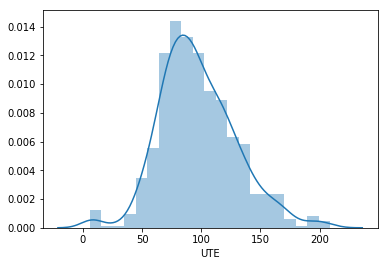

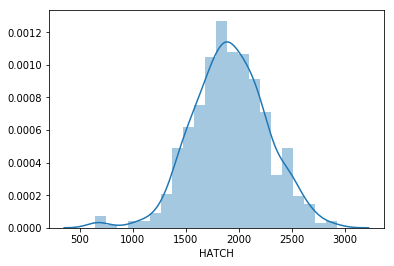

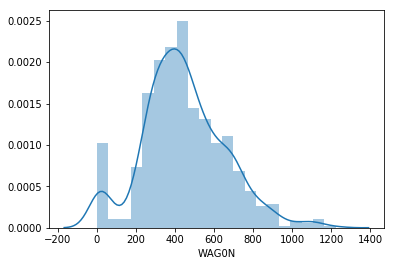

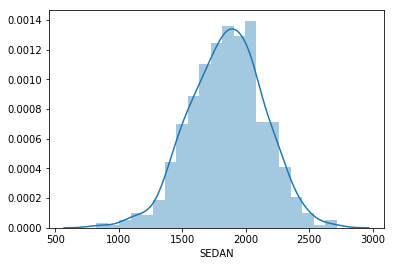

In [6]:
# Distribution of UTE
ute_dist = sns.distplot(df['UTE'].dropna())
plt.show()

# Distribution of Hatch
hatch_dist = sns.distplot(df['HATCH'].dropna())
plt.show()

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
plt.show()

# Distribution of Sedan
sedan_dist = sns.distplot(df['SEDAN'].dropna())
plt.show()

As we can see in the distplots, there are a number of anomalies for the distribution of `WAG0N` in the dataset - particularly for wagon sales below 200 units. 

In order to quanitfy the anomalous values, we can increasae the number of bins and isolate the data to sales below 200 units as seen below

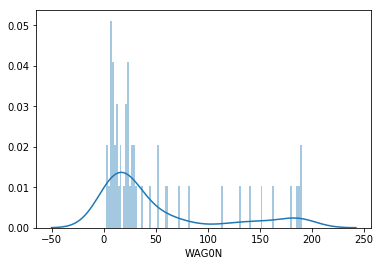

      HATCH   SEDAN  WAG0N    UTE  K__SALES_TOT
439  1695.0  1645.0    2.0   37.0         709.0
154  1693.0  1527.0    3.0  109.0         699.0
276  1629.0  1634.0    5.0   85.0         704.0
373  1541.0  1710.0    6.0  116.0         708.0
367  1842.0  1474.0    6.0   84.0         715.0
12   1811.0  1468.0    6.0   68.0         704.0
270  1715.0  1584.0    6.0   70.0         708.0
221  1574.0  1738.0    7.0   91.0         716.0
183  1562.0  1769.0    8.0   62.0         714.0
603  1496.0  1779.0    8.0   90.0         708.0
352  1896.0  1440.0    8.0   81.0         719.0
80   1509.0  1906.0    8.0   40.0         727.0
195  1748.0  1404.0   11.0  206.0         707.0
532  1790.0  1490.0   11.0  134.0         719.0
28   1760.0  1458.0   12.0   55.0         689.0
285  1501.0  1836.0   13.0   88.0         721.0
594  1724.0  1575.0   13.0   92.0         714.0
395  1550.0  1824.0   14.0   66.0         725.0
618  1524.0  1706.0   16.0  114.0         705.0
446  1356.0  1954.0   17.0   61.0       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
# Distribution of Wagon
wagon_dist = sns.distplot(df[df['WAG0N'] < 200]['WAG0N'].dropna(),bins=100)
plt.show()

# Print rows with the bottom 10 sales for the station wagons
print(df.sort_values(by='WAG0N')[df['WAG0N'] < 200].head(20))

#### Outliers
As shown above, the distplot for stores selling fewer than 200 station wagons shows an unusually high number of stores selling fewer than 30 station wagons.

Additionally, by comparing sales of Station Wagon against sales of other car models in these instances, We can identify a number of cases where the sales of Station Wagons are over 10 times lower than the nearest model at the same dealership. This pattern appears to be indicative of erronious data. As K-Means clustering is sensitive to outliers, these rows should be dropped from the analysis.

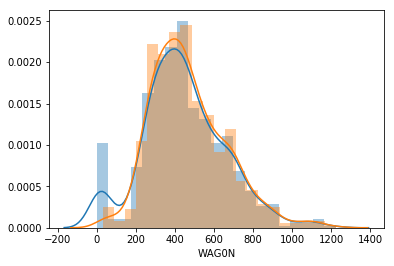

In [8]:
# Drop Outliers from WAG0N
df1 = df[df['WAG0N']>30]

# Distribution of Wagon
wagon_dist = sns.distplot(df['WAG0N'].dropna())
wagon_dist = sns.distplot(df1['WAG0N'].dropna())
plt.show()

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
For the purposes of clustering, we will include the `HATCH`, `SEDAN`, `WAG0N` and `UTE` variables.
These variables measure the number of sales of a particular model of vehicle made by particular a car dealership (signified by `LOCATION_NUMBER` or `DEALER_CODE`).

The variables `LOCATION_NUMBER` and `DEALER_CODE` will not be included in the analysis, as unique variables do not contribute to clustering models. Additionally, `REPORT_DATE` will not be included in the analysis as it contains the same value for all observations. Finally, `K_SALES_TOT` will also be discluded from the Dataset, as the derrived value is not useful for our analysis.

<table>
<tr>
        <th>Variable</th>
        <th>Role</th>
        <th>Measurement Level Set</th>
</tr>
<tr>
        <td>LOCATION_NUMBER</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>REPORT_DATE</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>DEALER_CODE</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>HATCH</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>WAG0N</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>SEDAN</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>UTE</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
<tr>
        <td>K__SALES_TOT</td>
        <td>Input</td>
        <td>Interval</td>
</tr>
</table>

In [9]:
df2 = df1[['UTE','HATCH','WAG0N','SEDAN']].dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 674
Data columns (total 4 columns):
UTE      620 non-null float64
HATCH    620 non-null float64
WAG0N    620 non-null float64
SEDAN    620 non-null float64
dtypes: float64(4)
memory usage: 24.2 KB


### 3. Identify a car model that is underperforming in sales. Based on your reporting, the company does not want to focus thir efforts on this car model anymore and has decided to drop it from manufacturing. Now onwards, the selected car product should not be part of analysis
By comparing the distributions of each model of car, it is possible to identify how car sales are distributed among dealerships.

Below are the sales distributions of each car model.

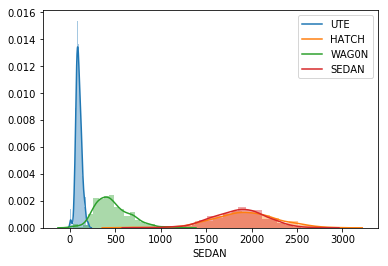

In [10]:
# Distribution of all Models
comb_dist = sns.distplot(df2['UTE'].dropna(),kde_kws={"label":"UTE"})
comb_dist = sns.distplot(df2['HATCH'].dropna(),kde_kws={"label":"HATCH"})
comb_dist = sns.distplot(df2['WAG0N'].dropna(),kde_kws={"label":"WAG0N"})
comb_dist = sns.distplot(df2['SEDAN'].dropna(),kde_kws={"label":"SEDAN"})
plt.show()

As shown above, the `UTE` model has the poorest performance among vehicle models, with the majority of dealerships selling fewer than 100 models over the sales period.

Due to this, the `UTE` model will be removed from the analysis as instructed by the brief.

In [11]:
# Drop underperforming vehicle UTE
df2.drop(['UTE'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 674
Data columns (total 3 columns):
HATCH    620 non-null float64
WAG0N    620 non-null float64
SEDAN    620 non-null float64
dtypes: float64(3)
memory usage: 19.4 KB


## Task 2. The First Clustering Model
### 1. Build a default clustering model with K = 3
Below is the method that will be used to perform clustering in this section

In [12]:
def performKMeansClustering(docIn, k=3, scale=False,rs=42, report_cluster_distances=True):
    """
    Perform KMeans clustering on provided dataset and assign Model ID to each row
    """
    # Create copy of input dataset to return
    doc = docIn.copy()
    
    # convert the dataset into a matrix
    X = doc.as_matrix()
    
    if scale:
        # scale the variables
        s = StandardScaler()
        X = s.fit_transform(X)

    # set the random state for the model
    model = KMeans(n_clusters=k, random_state=rs).fit(X)

    if report_cluster_distances:
        # report sum of intra-cluster distances
        print("Sum of intra-cluster distance:", model.inertia_)
        print("Centroid Locations:")
        for c in model.cluster_centers_:print(c)
            
    # assign cluster to each record in X
    y = model.predict(X)
    
    # Assign cluster id's to each row and return 
    doc['Cluster_ID'] = y
    
    return doc, X

# Perform KMeans clustering on dataset without normalisation
df2, X = performKMeansClustering(df2)

Sum of intra-cluster distance: 64990666.74043471
Centroid Locations:
[1919.17045455  414.95075758 1946.83333333]
[2313.91534392  401.52910053 1582.62962963]
[1500.10778443  634.43712575 2048.30538922]


#### a. How many records are assigned into each cluster?
Once we have performed clustering on the dataset

In [13]:
def reportClusterMembership(doc):
    # print the number of members for each cluster
    print("Distribution of Cluster Members")
    print(doc['Cluster_ID'].value_counts())
    
reportClusterMembership(df2)

Distribution of Cluster Members
0    264
1    189
2    167
Name: Cluster_ID, dtype: int64


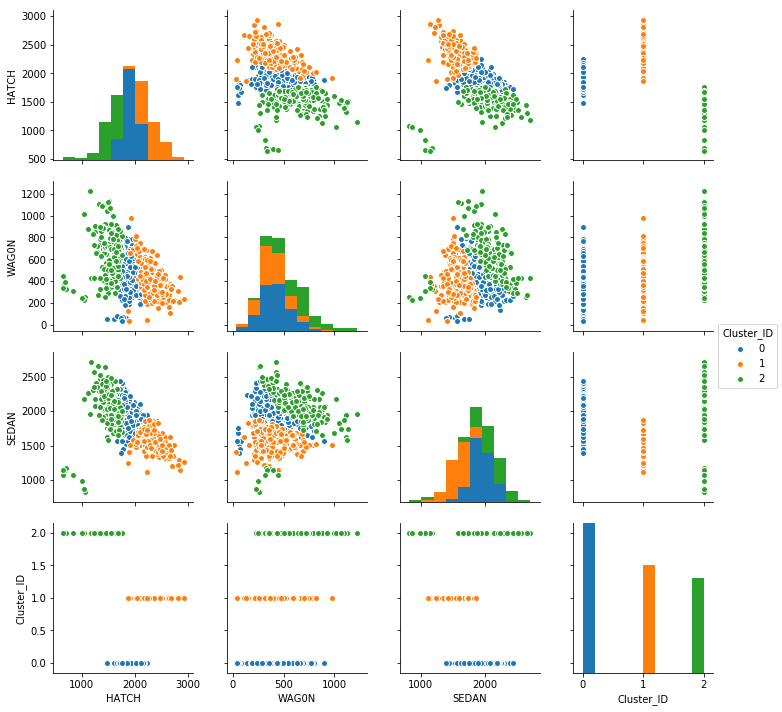

In [14]:
def visCluster(doc):
    """
    Generate Pair Plot to visualise clusters
    """
    # Generate Pairplot for clusters
    cluster = sns.pairplot(doc, hue='Cluster_ID')
    plt.show()

# Plot clusters as pairplot
visCluster(df2)

Distribution for cluster 2


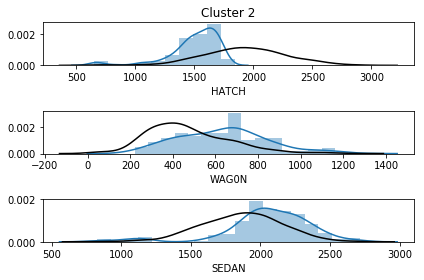

Distribution for cluster 0


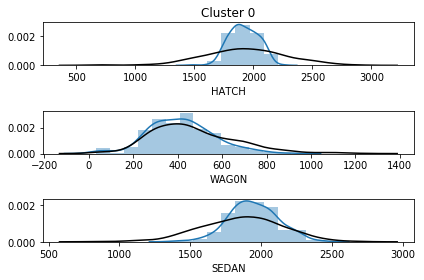

Distribution for cluster 1


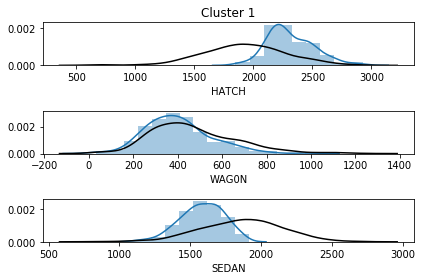

In [15]:
def clusterDistributions(doc, n_bins=20, cols=[], clusters=[]):
    """
    Plot distribution of variables in each cluster, in relation to distributions of varibles in the dataset
    """
    
    # if specific clusters not provided, go over entire range
    if len(clusters) == 0:
        clusters_to_inspect = doc['Cluster_ID'].unique()

    for cluster in clusters_to_inspect:
        # inspecting cluster 0
        print("Distribution for cluster {}".format(cluster))

        # create subplots
        fig, ax = plt.subplots(nrows=3)
        ax[0].set_title("Cluster {}".format(cluster))

        for j, col in enumerate(cols):
            # create the bins
            bins = np.linspace(min(doc[col]), max(doc[col]), 20)
            # plot distribution of the cluster using histogram
            sns.distplot(doc[doc['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
            # plot the normal distribution with a black line
            sns.distplot(doc[col], bins=bins, ax=ax[j], hist=False, color="k")

        plt.tight_layout()
        plt.show()
        
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['HATCH', 'WAG0N', 'SEDAN']
clusterDistributions(df2,cols=cols)

#### b. Plot the cluster distribution using pairplot. Explain key characteristics of each culuster/segment

Cluster 0 primarily sells Sedans, with their next highest model being Hatchs.

Cluster 1 primarily sells mostly Hatch's, with about equal sales of Sedans and Wagons.

Cluster 2 primarily sells Wagons and Sedans.

### 2. What is the effecti of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

In [16]:
# Perform K means clustering with normalised variables
df2, X = performKMeansClustering(df2,scale=True)

Sum of intra-cluster distance: 948.413398686102
Centroid Locations:
[-1.17248597  0.9048429   0.70320447  1.40470926]
[-0.02103397 -0.28675528  0.29002834 -1.03003259]
[ 1.04195368 -0.38531772 -1.00835717  0.21021768]


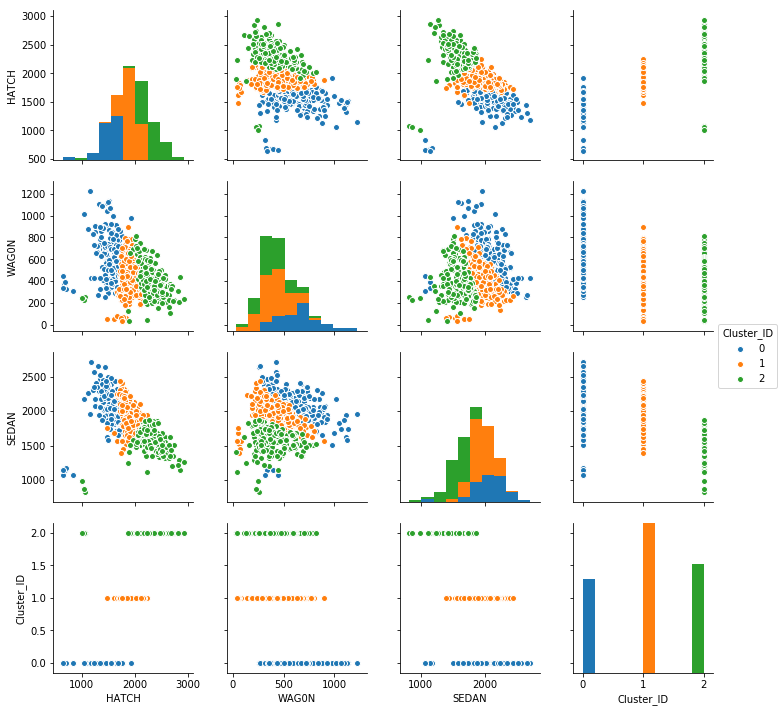

In [17]:
# Plot clusters for the normalised dataset
visCluster(df2)

Distribution for cluster 0


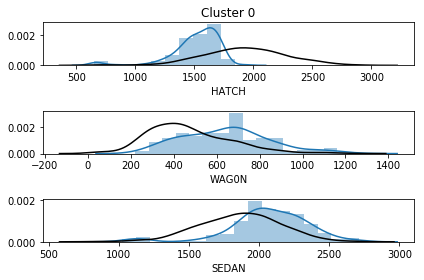

Distribution for cluster 1


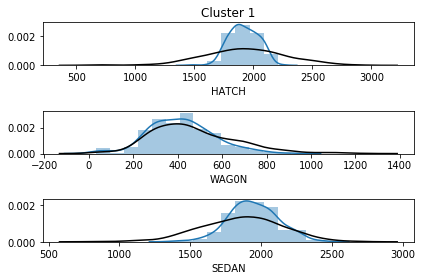

Distribution for cluster 2


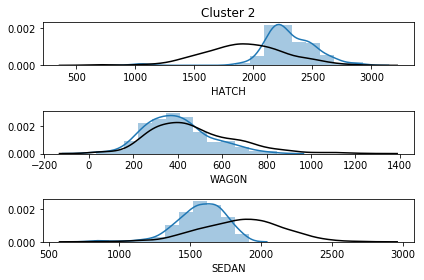

In [18]:
# View Distributions of clusters in the normalised dataset
clusterDistributions(df2,cols=cols)

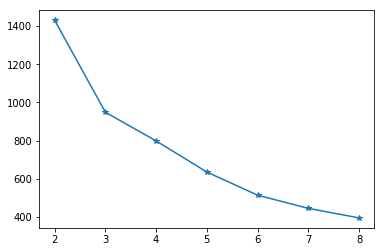

In [19]:
def computeKGraph(doc,X,rs=42,k_range=range(2,9,1)):
    """
    Plot cluster model inertia for given dataset with different leves of K applied
    """
    # Lists for clusters and costs
    clusters = []
    inertia_vals = []

    # calculate inertia for k
    for k in k_range:
        # train with the current K value
        model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
        model.fit(X)

        # append model to lits
        clusters.append(model)
        inertia_vals.append(model.inertia_)

    # Plot the outpt of inertai vs the value of K
    plt.plot(range(2,9,1), inertia_vals, marker='*')
    plt.show()
    return clusters, inertia_vals
    
# Perform analysis on previously calculated dataset
clusters, inertia = computeKGraph(df2,X)

In [20]:
def identifyOptimalK(clusters,verbose=False):
    """
    Use the elbow rule to identify the optimal value of K
    """
    # Initialise variables for storing optimal K value
    best_K = 0
    maxSilhouette = 0
    
    # Iterate through all elements in 
    for clust in clusters:
        # Get silhouette score for cluster
        sil = silhouette_score(X, clust.predict(X))
        if sil > maxSilhouette:
            maxSilhouette = sil
            best_K = clust.n_clusters
        
        # Print verbose details on each cluster
        if verbose:
            print(clust)
            print("Silhouette Score for K={}".format(clust.n_clusters), sil)
            print("-"*20)
    
    # Print results and return K
    print("Optimal K = ",best_K, "with score ", maxSilhouette)
    return best_K
        
# Compute optimal K based on the provided dataset
optimal_K = identifyOptimalK(clusters)

Optimal K =  2 with score  0.4747917998590413


Sum of intra-cluster distance: 1407.8422305639508
Centroid Locations:
[ 0.99626955 -0.43952127 -0.99467744  1.20680858]
[-0.47441407  0.20929584  0.47365592 -0.57467075]


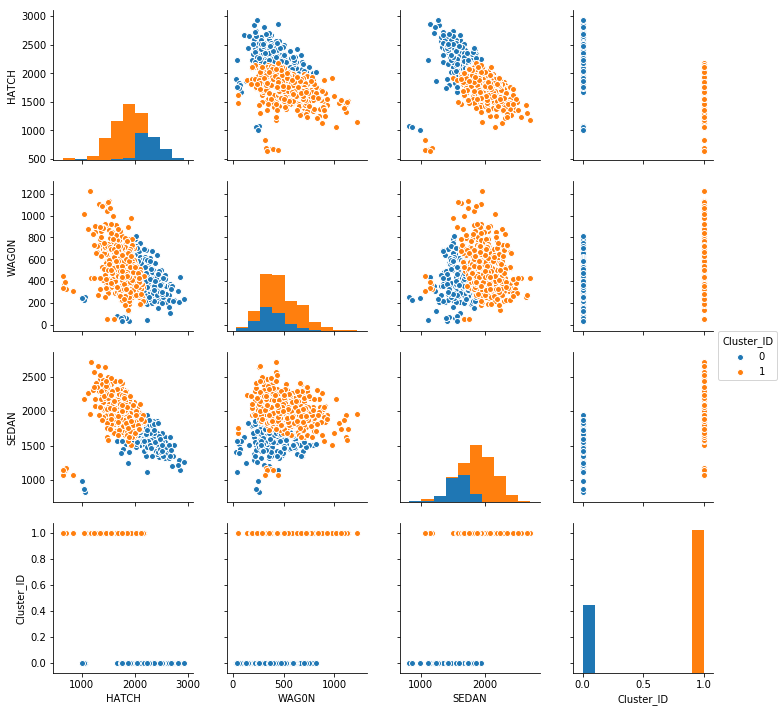

In [21]:
# Perform clustering with the optimal K discovered in the previous step
df2, X = performKMeansClustering(df2,k=optimal_K,scale=True)
visCluster(df2)

- Cluster 0 Consists primarily of Sedans with Hatchs being the next most sold model
- Cluster 1 comprises the majority of the dataset. Contains mostly Hatchs with an equal distribution of Wagons and Sedans
- Cluster 2 Consists of Mostly Sedans and Wagons with some Hatchs
- Cluster 3 Consists of equal distributions of Hatch and Sedans with fewer Wagons

### 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label

---
## Part 2: Association Mining and it's data Pre-processing<a name="association"></a>

### 1. Can you identify data quality issues in this dataset for performing association mining?


In [22]:
import pandas as pd

# load the transaction dataset
df = pd.read_csv('Casestudy2-Data-Py/pos_transactions.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location           459258 non-null int64
Transaction_Id     459258 non-null int64
Transactin_Date    459258 non-null object
Product_Name       459258 non-null object
Quantity           459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   Location  Transaction_Id Transactin_Date    Product_Name  Quantity
0         2           12359      2012-10-23       Candy Bar         1
1         9           12362      2012-10-23   Pain Reliever         1
2         9           12362      2012-10-23   Pain Reliever         1
3         5           12365      2012-10-23      Toothpaste         1
4         2           12371      2012-10-23             Bow         1
5         6           12380      2012-10-23  Greeting Cards         1
6         1           12383      2012-10-23   Pain Reliever         1
7         1           12383      2012-10-23   Pain Reliever        

From the first 10 transaction shown above, we can easily see that there are duplicated transactions in the dataset.
That can be seen clearly by grouping the data (see the result below)

In [23]:
df.groupby(df.columns.tolist(),as_index=False).size().sort_values(ascending = False).reset_index().rename(columns={0: 'Frequency'})

Location  Transaction_Id Transactin_Date    Product_Name  Quantity  \
0              1          816536      2012-10-27        Magazine         1   
1              6           79610      2012-10-24      Toothpaste         1   
2              7         1143932      2012-10-29  Greeting Cards         1   
3              8          205484      2012-10-24   Pain Reliever         1   
4              8           34322      2012-10-23       Candy Bar         1   
5              6         1014407      2012-10-28             Bow         1   
6             10          427835      2012-10-26        Magazine         1   
7              6          362087      2012-10-25       Candy Bar         1   
8              7          205490      2012-10-24             Bow         1   
9              1         1068674      2012-10-28        Magazine         1   
10             5          712436      2012-10-27        Magazine         1   
11             8          205496      2012-10-24      Toothpaste         1   
12             9         1140599      2012-10-29        Magazine         1   
13             8          205484      2012-10-24         Perfume         1   
14             6          450677      2012-10-26             Bow         1   
15             5          451640      2012-10-26      Toothpaste         1   
16             7          824726      2012-10-27             Bow         1   
17             8          315824      2012-10-25        Magazine         1   
18             8          400544      2012-10-26        Magazine         1   
19             3           75389      2012-10-24      Toothpaste         1   
20             1          164825      2012-10-24        Magazine         1   
21            10           27950      2012-10-23        Magazine         1   
22             8         1049675      2012-10-28       Candy Bar         1   
23             4          189611      2012-10-24         Pencils         1   
24             7          938843      2012-10-28        Magazine         1   
25             4          743966      2012-10-27       Candy Bar         1   
26             1          161075      2012-10-24        Magazine         1   
27             1          144416      2012-10-24        Magazine         1   
28             1          429884      2012-10-26        Magazine         1   
29             4          339830      2012-10-25        Magazine         1   
...          ...             ...             ...             ...       ...   
290183         7          125954      2012-10-24      Toothpaste         1   
290184         7          125963      2012-10-24      Toothpaste         1   
290185         7          126134      2012-10-24        Magazine         1   
290186         7          126155      2012-10-24            Pens         1   
290187         7          127505      2012-10-24       Candy Bar         1   
290188         7          127469      2012-10-24      Toothbrush         1   
290189         7          127469      2012-10-24        Magazine         1   
290190         7          127439      2012-10-24   Pain Reliever         1   
290191         7          127361      2012-10-24         Shampoo         1   
290192         7          127283      2012-10-24  Greeting Cards         1   
290193         7          127178      2012-10-24      Toothbrush         1   
290194         7          127163      2012-10-24         Pencils         1   
290195         7          127118      2012-10-24         Pencils         1   
290196         7          127118      2012-10-24  Greeting Cards         1   
290197         7          127118      2012-10-24       Candy Bar         1   
290198         7          127088      2012-10-24            Soap         1   
290199         7          127064      2012-10-24            Pens         1   
290200         7          126893      2012-10-24         Perfume         1   
290201         7          126839      2012-10-24   Pain Reliever         1   
290202         7          1268

The 'Frequency' column in the result above indicates the number of duplicated transactions for each unique transaction in the dataset. Therefore, we will drop those duplicated transactions except for the first occurence. Hence the number of transactions will be decreased that help the apriori algorithm (in the question 3)run faster 

In [24]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

As were are looking to generate association rules from items purchased by each transaction, we need to group our Transaction_Id and then generate a list of all items purchased.

In [25]:
# group by Transaction_Id, then list all items
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

Transaction_Id
12359                       [Candy Bar]
12362                   [Pain Reliever]
12365                      [Toothpaste]
12371                             [Bow]
12380                  [Greeting Cards]
12383                   [Pain Reliever]
12386                   [Pain Reliever]
12392               [Shampoo, Magazine]
12401    [Candy Bar, Pencils, Magazine]
12404                       [Candy Bar]
Name: Product_Name, dtype: object


### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
Association mining usually consists of two variables: a transaction ID and an item. Due to the main target which is to find out the associations between items purchased from the health and beauty aids department and the stationary department, the Product_Name should be chosen as the target variable and the Transaction_ID is chosen as ID. In summary, the variables included in the analysis as the below table.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
    </tr>
    <tr>
        <td>Product_Name</td>
        <td>Target</td>
        <td>Nominal</td>
    </tr>
    <tr>
        <td>Transaction_Id</td>
        <td>ID</td>
        <td>Nominal</td>
    </tr>
</table>

### 3. Conduct association mining and answer the following:
#### a. What is the highest lift value for the resulting rules? Which rule has this value?

Once the transactions table contains all items purchased in each transaction, we will run the apyori model with the pre-processed transactions and min_support of 0.01. This min support is chosen because the number of rules decreases when the min support increases (see the table below) 
<table>
    <tr>
        <th>Min Support</th>
        <th>Number of rules</th>
    </tr>
    <tr>
        <td>0.01</td>
        <td>72</td>
    </tr>
    <tr>
        <td>0.02</td>
        <td>38</td>
    </tr>
    <tr>
        <td>0.03</td>
        <td>29</td>
    </tr>
</table>

In [26]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.01))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bow'}), support=0.054645, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bow'}), confidence=0.054645, lift=1.0)]), RelationRecord(items=frozenset({'Candy Bar'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Candy Bar'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Greeting Cards'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Greeting Cards'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Magazine'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magazine'}), confidence=0.241305, lift=1.0)]), RelationRecord(items=frozenset({'Pain Reliever'}), support=0.0267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pain Reliever'}), confidence=0.0267, lift=1.0)])]


In [27]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(len(result_df))
print(result_df.head(20))

72
         Left_side      Right_side   Support  Confidence      Lift
0                              Bow  0.054645    0.054645  1.000000
1                        Candy Bar  0.171005    0.171005  1.000000
2                   Greeting Cards  0.146885    0.146885  1.000000
3                         Magazine  0.241305    0.241305  1.000000
4                    Pain Reliever  0.026700    0.026700  1.000000
5                          Pencils  0.134925    0.134925  1.000000
6                             Pens  0.143575    0.143575  1.000000
7                          Perfume  0.089960    0.089960  1.000000
8                   Photo Processi  0.058480    0.058480  1.000000
9                   Prescription M  0.014505    0.014505  1.000000
10                         Shampoo  0.033800    0.033800  1.000000
11                            Soap  0.043025    0.043025  1.000000
12                      Toothbrush  0.067350    0.067350  1.000000
13                      Toothpaste  0.160425    0.160425  1

In order to find out the highest lift value for the resulting rules, we will sort the rules by Lift using the code below:

In [28]:
# sort all acquired rules descending by lift# sort a 
result_df = result_df.sort_values(by='Lift', ascending=False)
print(len(result_df))
print(result_df.head(20))


72
                    Left_side      Right_side   Support  Confidence      Lift
49                    Perfume      Toothbrush  0.021820    0.242552  3.601370
50                 Toothbrush         Perfume  0.021820    0.323979  3.601370
16                 Toothbrush             Bow  0.011340    0.168374  3.081236
15                        Bow      Toothbrush  0.011340    0.207521  3.081236
52         Magazine,Candy Bar  Greeting Cards  0.016665    0.411126  2.798966
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
71        Magazine,Toothpaste  Greeting Cards  0.011945    0.377230  2.568202
62        Magazine,Toothpaste       Candy Bar  0.013720    0.433286  2.533762
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
68           Magazine,Pencils  Greeting Cards  0.010955    0.346348  2.357956
55       Toothpaste,Candy Bar  Greeting Cards  0.013175    0.

From the result above, the highest lift value is 3.60
There are two rules having this value: Perfume -> Toothbrush and Toothbrush -> Perfume

#### b. What is the highest confidence value for the resulting rules? Which rule has this value?

In order to find out the highest confidence value for the resulting rules, we will sort the rules by Confidence using the code below:

In [29]:
# sort all acquired rules descending by Confidence# sort a 
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(20))

                    Left_side      Right_side   Support  Confidence      Lift
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
62        Magazine,Toothpaste       Candy Bar  0.013720    0.433286  2.533762
52         Magazine,Candy Bar  Greeting Cards  0.016665    0.411126  2.798966
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
51   Greeting Cards,Candy Bar        Magazine  0.016665    0.381699  1.581813
59           Magazine,Pencils       Candy Bar  0.012005    0.379545  2.219495
71        Magazine,Toothpaste  Greeting Cards  0.011945    0.377230  2.568202
67     Greeting Cards,Pencils        Magazine  0.010955    0.374658  1.552633
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069
58          Pencils,Candy Bar        Magazine  0.012005    0.363623  1.506900
68           Magazine,Pencils  Greeting Cards  0.010955    0.346

From the result above, the highest confidence value is 46.37%.
The rule has this value is Magazie & Greeding Cards -> Candy Bar  

#### c. Plot the confidence, lift, support of the resulting rules? Interpret them to discuss the rule-set obtained

In [30]:
support = result_df['Support'].as_matrix()
confidence = result_df['Confidence'].as_matrix()
lift = result_df['Lift'].as_matrix()
lift

array([2.71198044, 2.68207763, 2.53376195, 2.79896645, 2.4016375 ,
       1.58181346, 2.21949496, 2.5682022 , 1.55263257, 1.54306945,
       1.50690038, 2.35795625, 2.15050459, 1.42929874, 2.10985149,
       2.25480193, 2.04922168, 3.60136964, 1.8810262 , 2.23457425,
       1.73819091, 2.19502545, 2.12210329, 1.16606887, 1.73819091,
       1.45005315, 1.02513579, 1.43090258, 3.60136964, 1.        ,
       0.98232466, 0.97149472, 1.45005315, 1.36139723, 1.47539224,
       3.08123643, 1.36139723, 1.47539224, 0.81797706, 0.81067486,
       1.43090258, 0.79188134, 1.13465515, 1.        , 3.08123643,
       0.98232466, 1.        , 1.13465515, 1.02513579, 0.61047126,
       1.        , 1.        , 1.        , 0.81797706, 0.97149472,
       1.        , 0.61047126, 0.4995511 , 0.44783534, 0.4995511 ,
       0.79188134, 1.16606887, 1.        , 0.44783534, 1.        ,
       1.        , 0.81067486, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

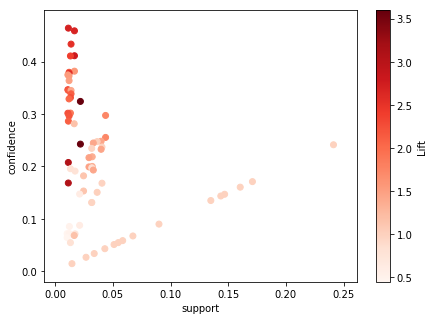

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(3, figsize=(7,5))
plt.scatter(support, confidence, c=lift, cmap='Reds')
plt.xlabel('support')
plt.ylabel('confidence') 

plt.colorbar().set_label('Lift')


The figure above shows describes the support, confidence and lift for rules discovered during the association mining step.

Support describes the probability of a rule appearing within the dataset. With respects to the data, Support describes the frequency with which Itemset A appears with Itemset B in the data.
`Frequency of A and B/Total number of Rows`

Confidence of rule A=>B describes the probability of A and B occuring together in all elements containing A. With respects to the data, Confidence measures how frequently item A is purchased with item B against the frequency with which only A is present.
`Frequency of A and B/Frequency of only A`

Support and Confidence are important metrics for discovering the strength of a given association rule, however, high confidence is not necessarily indicative of a useful rule. Lift describes a ratio of confidence against support; This represents the 'predictive power' of a rule compared to random chance.
For example, a lift of 3 for A=>B indicates that customers who purchase A are 3 times more likely to also purchase B

- As we can see from the figure above, the rules having lift values more than 2.0 have high confidence and low support that is a good indicator. 
- The rules having low lift values have low support that is not a good indicator



### 4. The store is particularly interested in products that individuals purchase when they buy “Pens”.
#### a. How many rules are in the subset?

In [32]:
result_df.loc[result_df['Left_side'] == 'Pens']

Left_side  Right_side   Support  Confidence      Lift
36      Pens    Magazine  0.021150    0.147310  0.610471
24      Pens   Candy Bar  0.012265    0.085426  0.499551
47      Pens  Toothpaste  0.010315    0.071844  0.447835

There is 3 rules are in the subset

#### b. Based on the rules, what are the other products these individuals are most likely to purchase?

In [33]:
pensDf = result_df[result_df['Left_side'] == 'Pens']
otherProducts = pensDf.groupby(['Left_side'])['Right_side'].apply(list)
otherProducts.tolist()

[['Magazine', 'Candy Bar', 'Toothpaste']]

The other products these individuals are most like ly to purchase are Magazine, Candy Bar, Toothpaste

### 5. How the outcome of this study can be used by decision makers?

Based on the interest of the sore in determining the associations between items purchased from the health and beauty aids department and the stationary deparment, it should be benefit to consider the folowwing rules:

Toothpaste,Pencils  =>  Candy Bar

Magazine,Greeting Cards  =>  Candy Bar

Toothpaste,Magazine  =>  Candy Bar

Candy Bar,Magazine  =>  Greeting Cards

Candy Bar,Greeting Cards  =>  Magazine

Toothpaste,Greeting Cards  =>  Candy Bar

Pencils,Candy Bar  =>  Magazine

Pencils,Magazine  =>  Greeting Cards

Candy Bar,Magazine  =>  Toothpaste

Magazine,Greeting Cards  =>  Pencils

Toothbrush  =>  Perfume

The decision makers can use the rules extracted from this association mining to obtain the understainding of consumers' needs and behaviours. Based on these rules, several marketing strategies can be made, for example:

- The association rules can tell decision makers that there are several items that are often bought together. Therefore, promoting the items together can help increase the revenue. For example, promoting the combination of Candy Bar & Greeting Cards, Toothpase & Pencils, etc. 
- These rules can also be used to structure supermarket layout. For example, putting Gretting Cards on the shelves next to the Candy Bar shelves
- Based on the outcome of association mining, the purchasing pattern can be derrived. From there, customer segments can be identified
- Additionally, the outcome can be used to design catologies for the supermarket

---
## Part 3: Text Mining<a name="text"></a>

### 1.	What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

The selected column is the TEXT column, as this column contains the text data from which information will be extracted. All other columns are rejected.

The LANGUANGE, OMITTED, TRUNCATED, and EXTENSION columns are unary, and provide no meaningful data. Similarly, the URI, NAME, and FILTERED columns are incremental values that also provide no meaningful data. Finally, the columns CREATED, ACCESSED, and MODIFIED, appear to be date based values. Modified is binary, and the other columns only have thirty five unique values.

In [34]:
import pandas as pd

tf = pd.read_csv("Casestudy2-Data-Py/bbc.csv")

checkCols = ["CREATED", "ACCESSED", "MODIFIED"]

for col in checkCols:
    print(col, "- Unique:", len(tf[col].unique()))

CREATED - Unique: 35
ACCESSED - Unique: 35
MODIFIED - Unique: 2


### 2. Can you identify data quality issues in order to perform text mining?

In order to prepare the text for mining, it was first stripped of punctuation and analytically useless stopwords obtained from nltk StopWords. Secondly, the text is lemmatised using the nltk WordNet dictionary, in order to reduce words to their base format. Finally, the text is vectorised using the sklearn tf idf vectoriser, so that it can be used for clustering.

In [35]:
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

stopwords = set(sw.words('english'))
stopwords.update('�')
textColumn = 'TEXT'
clusters = 7
rs = 42
docTotal = len(tf[textColumn]) #store total documents for calculating document frequency percentages

In [36]:
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(tf[textColumn])
weights = tfidf_vec.idf_

# see the number of unique tokens produced by the vectorizer. Lots of them...
print("Unique tokens:", len(tfidf_vec.get_feature_names()))

Unique tokens: 36340


Without document and term frequency filtering, there are 36340 unique tokens found by the tf idf vectorizer. This is far too many to generate meaningful clusters.

In [37]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)

In [38]:
# function to visualise text cluster. Useful for the assignment too :)
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 7):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :num_word]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: indoor, world, record, olympic, bekele, idowu, champion, 
Top terms for cluster 1: cricket, play, say, pakistan, club, souness, want, 
Top terms for cluster 2: ball, wicket, run, strauss, australia, inning, boundary, 
Top terms for cluster 3: england, ireland, wale, nation, rugby, six nation, six, 
Top terms for cluster 4: 6, open, hewitt, win, 7, final, set, 
Top terms for cluster 5: say, cup, roddick, player, play, game, spain, 
Top terms for cluster 6: athletics, athens, drug, ban, athlete, year, marathon, 


As stated above, the clusters generated with unfiltered terms are damaged by high frequency, low value terms, such as terms like 'say', 'play', and 'ball'. These terms are vague and do not allow for meaningful conclusions to be drawn from the clusters. As such, the terms must be filtered using term/document frequency.

### 3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(tf[textColumn])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero(),
              'weights': weights[i]}
             for i, t in enumerate(count_vec.vocabulary_)]
    
    return terms
    
terms = calculate_tf_idf_terms(tf[textColumn])

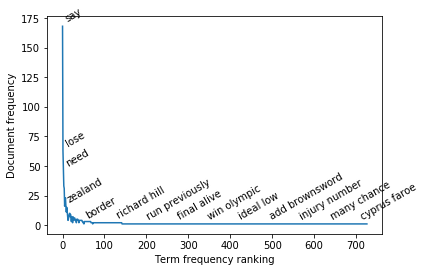

1)	Term: say 	Frequency: 447 	Weight: 5.61015772749913
2)	Term: win 	Frequency: 246 	Weight: 5.61015772749913
3)	Term: one 	Frequency: 204 	Weight: 5.61015772749913
4)	Term: go 	Frequency: 203 	Weight: 5.61015772749913
5)	Term: two 	Frequency: 197 	Weight: 5.61015772749913
6)	Term: time 	Frequency: 189 	Weight: 5.61015772749913
7)	Term: first 	Frequency: 185 	Weight: 5.61015772749913
8)	Term: get 	Frequency: 175 	Weight: 5.61015772749913
9)	Term: player 	Frequency: 164 	Weight: 5.61015772749913
10)	Term: make 	Frequency: 163 	Weight: 5.61015772749913


In [40]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
    return terms

#Store terms ordered by term frequency, document frequency
orderedTerms = visualise_zipf(terms).copy()

#Reorder terms by weights
terms.sort(key=lambda x: (x['weights']), reverse=True)
for i, term in enumerate(terms[0:10]):
    print(str(i + 1) + ")\tTerm:", term['term'], "\tFrequency:", term['tf'], "\tWeight:", term['weights'])

Using ZIPF law, the least useful terms can be calculated. As visualised above, the Top 10 least useful terms by weight are:

1. say
2. win
3. one
4. go
5. two
6. time
7. first
8. get
9. player
10. make

These terms have the highest tf-idf weight values, and thus provide no meaningful value to the clustering process.

### 4. Did you disregard any frequent terms? Justify their selection.

Examining the top 25 most frequent terms from the dataset, it can be observed that there is a large amount of vague sports terminology. All of the top ten least useful terms can be observed in the top 25 most frequent. The most frequent term, 'say', also provides no value.

In [41]:
#An array of zeroes equal to the number of documents, to count document frequencies
dfCount = [0] * docTotal

for i, term in enumerate(orderedTerms):
    if i < 25:
        print(str(i + 1) + ")\tTerm:", term['term'], "\tDocument Frequency:", (term['df'] / docTotal * 100), "%\tTerm Frequency", term['tf'])
    dfCount[term['df'] - 1] += 1

1)	Term: say 	Document Frequency: 84.0 %	Term Frequency 447
2)	Term: year 	Document Frequency: 67.0 %	Term Frequency 308
3)	Term: game 	Document Frequency: 53.0 %	Term Frequency 249
4)	Term: win 	Document Frequency: 51.0 %	Term Frequency 246
5)	Term: play 	Document Frequency: 52.0 %	Term Frequency 240
6)	Term: one 	Document Frequency: 52.0 %	Term Frequency 204
7)	Term: go 	Document Frequency: 56.00000000000001 %	Term Frequency 203
8)	Term: take 	Document Frequency: 56.00000000000001 %	Term Frequency 202
9)	Term: england 	Document Frequency: 26.0 %	Term Frequency 199
10)	Term: two 	Document Frequency: 51.5 %	Term Frequency 197
11)	Term: time 	Document Frequency: 57.49999999999999 %	Term Frequency 189
12)	Term: first 	Document Frequency: 44.5 %	Term Frequency 185
13)	Term: world 	Document Frequency: 46.0 %	Term Frequency 180
14)	Term: get 	Document Frequency: 43.5 %	Term Frequency 175
15)	Term: player 	Document Frequency: 41.0 %	Term Frequency 164
16)	Term: make 	Document Frequency: 54.0

Most of the high frequency terms occur within 40-50% of the documents, except for the 9th term, 'england'. This term can be useful for clustering, and may provide useful information. All terms above 40% document frequency (appearing in over 80 documents), will be disregarded through filtering.

In [42]:
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=1, max_df=0.4)
X = tfidf_vec.fit_transform(tf[textColumn])

# see the number of unique tokens produced by the vectorizer. Lots of them...
tokenCount = len(tfidf_vec.get_feature_names())
print("Unique tokens for 40%:", tokenCount)

kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Unique tokens for 40%: 36320
Top terms for cluster 0: test, ball, wicket, pakistan, cricket, australia, day, 
Top terms for cluster 1: williams, wale, jones, half, scotland, italy, minute, 
Top terms for cluster 2: england, ireland, referee, wilkinson, injury, rugby, nation, 
Top terms for cluster 3: race, athens, athletics, marathon, cross country, chepkemei, paula, 
Top terms for cluster 4: open, 6, roddick, australian, australian open, hewitt, 7, 
Top terms for cluster 5: club, season, cup, team, manager, rugby, farrell, 
Top terms for cluster 6: liverpool, real, benitez, chelsea, madrid, want, club, 


Limiting the maximum document frequency to 40% removes 20 terms, which is terms 1-21, excluding 'england'.

### 5. Justify the term weighting option selected

The maximum document frequency is set to 40% to remove vague, high frequency terms, as explained above.

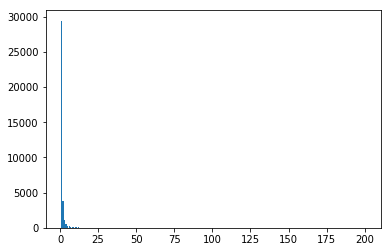

Document Frequency 1 - 5: 35101 Remainder: 1219 Elements: [29435, 3772, 1058, 523, 313]


In [43]:
#Show distribution of document frequencies.
plt.bar(range(1, len(dfCount) + 1), dfCount)
plt.show()

print("Document Frequency 1 - 5:", sum(dfCount[0:5]), "Remainder:", tokenCount - sum(dfCount[0:5]),  "Elements:", dfCount[0:5])

There are 35101 tokens that only appear in 5 or less documents, and over 29435 only appear in 1. Due to this large portion, filtering a higher minimum document frequency may remove too many terms.

In [44]:
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.4)
X = tfidf_vec.fit_transform(tf[textColumn])

# see the number of unique tokens produced by the vectorizer. Lots of them...
tokenCount = len(tfidf_vec.get_feature_names())
print("Unique tokens for min_df = 2:", tokenCount)

kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

print()
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.4)
X = tfidf_vec.fit_transform(tf[textColumn])

# see the number of unique tokens produced by the vectorizer. Lots of them...
tokenCount = len(tfidf_vec.get_feature_names())
print("Unique tokens for min_df = 3:", tokenCount)

kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

print()
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=4, max_df=0.4)
X = tfidf_vec.fit_transform(tf[textColumn])

# see the number of unique tokens produced by the vectorizer. Lots of them...
tokenCount = len(tfidf_vec.get_feature_names())
print("Unique tokens for min_df = 4:", tokenCount)

kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

print()
# tf idf vectoriser
tfidf_vec = TfidfVectorizer(strip_accents = 'unicode', tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=5, max_df=0.4)
X = tfidf_vec.fit_transform(tf[textColumn])

# see the number of unique tokens produced by the vectorizer. Lots of them...
tokenCount = len(tfidf_vec.get_feature_names())
print("Unique tokens for min_df = 5:", tokenCount)

kmeans = KMeans(n_clusters=clusters, random_state=rs).fit(X)
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Unique tokens for min_df = 2: 6885
Top terms for cluster 0: england, cricket, ball, south, pakistan, test, day, 
Top terms for cluster 1: 6, roddick, 7, 3, set, moya, nadal, 
Top terms for cluster 2: open, australian, grand slam, slam, wale, australian open, grand, 
Top terms for cluster 3: club, manager, want, beckham, real, league, deal, 
Top terms for cluster 4: race, indoor, olympic, marathon, athens, record, cross country, 
Top terms for cluster 5: drug, ban, greek, iaaf, test, kenteris, athlete, 
Top terms for cluster 6: liverpool, chelsea, arsenal, benitez, ferguson, gerrard, shot, 

Unique tokens for min_df = 3: 3113
Top terms for cluster 0: arsenal, chelsea, henry, ferguson, wenger, beckham, team, 
Top terms for cluster 1: race, athletics, athens, olympic, indoor, medal, record, 
Top terms for cluster 2: england, wale, ireland, nation, six nation, six, scotland, 
Top terms for cluster 3: 6, roddick, cup, 7, spain, moya, davis cup, 
Top terms for cluster 4: cricket, england, pa

Examining the clusters generated at different min_df levels, setting the minimum document frequency to 4 produces the best results. Meaningful clusters are generated such as the cricket tests for cluster 0, and athletics bans for cluster 4.

### 6. What is the number of input features available to execute clustering?  (For information: Note how the original text data is now converted into a feature set that can be mined for knowledge discovery?)

To reduce the tfidf frequency matrix, Singular Value Decomposition was used. By setting the number of components to 100, a significantly smaller matrix is created.

In [45]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=rs)
X_trans = svd.fit_transform(X)

# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = tfidf_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 england, open, 6, club, team, 
Top terms in component #1 6, open, 7, roddick, australian, 
Top terms in component #2 england, ball, wicket, south, australia, 
Top terms in component #3 test, athens, ban, athletics, drug, 
Top terms in component #4 ireland, wale, nation, six nation, scotland, 
Top terms in component #5 6, indoor, arsenal, 7, record, 
Top terms in component #6 drug, greek, kenteris, iaaf, ban, 
Top terms in component #7 roddick, moya, cup, davis, davis cup, 
Top terms in component #8 chepkemei, cross country, marathon, radcliffe, country, 
Top terms in component #9 liverpool, pakistan, 6, shane, club, 


In [46]:
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, tfidf_vec.get_feature_names(), num_word = 15)

Top terms for cluster 0: open, 6, australian, australian open, hewitt, 7, federer, match, grand slam, final, wimbledon, slam, grand, roddick, safin, 
Top terms for cluster 1: ireland, england, wale, nation, six nation, scotland, six, italy, half, france, williams, side, try, hodgson, wing, 
Top terms for cluster 2: club, rugby, england, cup, bath, director, coach, new, sri, team, celtic, want, season, zealand, new zealand, 
Top terms for cluster 3: athens, olympic, race, athletics, indoor, medal, record, athlete, drug, ban, marathon, champion, chepkemei, paula, european, 
Top terms for cluster 4: cricket, pakistan, ball, test, wicket, day, england, south, series, africa, south africa, vaughan, australia, india, run, 
Top terms for cluster 5: chelsea, arsenal, liverpool, club, newcastle, want, real, ferguson, manager, bos, league, manchester, souness, madrid, city, 
Top terms for cluster 6: moya, davis cup, davis, roddick, spain, cup, nadal, clay, seville, 6, beat, 7, carlos, single, vi

### 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

There were seven clusters generated through singular value decomposition. These clusters each had meaningful categories and themes.

Cluster 1: Australian Open Tennis

Containing terms such as Hewitt, Federer, Australian Open and Grand Slam, this cluster is about professional tennis.

Cluster 2: Six Nation Rugby Union
      
Featuring the term 'Six Nation' and the six nations that competed in the tournament, 'Ireland', 'England', 'Wales', 'Scotland', 'Italy' and 'France', this cluster focuses on the annual Six Nationa Rugby Union competition     
        
Cluster 3: Rugby Team Changes

This cluster is about changes in staff and players in rugby teams. This is evidenced by the terms 'rugby', 'club', 'director', 'coach', 'new' and 'want'

Cluster 4: Athletics Drug Bans

With the terms 'Athens', 'Olympic', 'athletics', 'drug' and 'ban', this cluster is about drug related bans occurring at the Athens Olympics.

Cluster 5: Cricket Tests

Featuring cricketing nations such as 'Pakistan', 'Australia', 'South Africa' and 'India', as well as the terms 'cricket', 'test', 'wicket' and 'run'. This section is about cricket test matches between nations.

Cluster 6: European Football

Naming several prominent European Football clubs, 'Chelsea', 'Arsenal', 'Liverpool' and 'Manchester', this section is about the European Football League

Cluster 7: Davis Cup Tennis

The final cluster is about the Davis Cup in tennis. This can be shown by the terms 'Davis Cup' and the names of famous professional tennis players such as 'Roddick', 'Nadal' and 'Moya'.

### 8. Identify the first fifteen high frequent terms (that are not stop words or noise) in the start list?

To find the first fifteen most frequent terms, the remaining terms used in the singular value decomposition are extracted from the complete list of terms ordered by term frequency, created in question 4.

In [47]:
svdTerms = []
for term in orderedTerms:
    if term['term'] in tfidf_vec.get_feature_names():
        svdTerms.append(term)

In [48]:
for i, term in enumerate(svdTerms[0:40]):
    print(str(i + 1) + ")\tTerm:", term['term'], "\tFrequency:", term['tf'])

1)	Term: england 	Frequency: 199
2)	Term: team 	Frequency: 144
3)	Term: match 	Frequency: 133
4)	Term: second 	Frequency: 132
5)	Term: set 	Frequency: 131
6)	Term: 6 	Frequency: 130
7)	Term: give 	Frequency: 126
8)	Term: day 	Frequency: 126
9)	Term: open 	Frequency: 126
10)	Term: final 	Frequency: 120
11)	Term: new 	Frequency: 116
12)	Term: want 	Frequency: 113
13)	Term: three 	Frequency: 112
14)	Term: cup 	Frequency: 111
15)	Term: good 	Frequency: 110
16)	Term: think 	Frequency: 110
17)	Term: u 	Frequency: 109
18)	Term: club 	Frequency: 109
19)	Term: four 	Frequency: 107
20)	Term: run 	Frequency: 106
21)	Term: injury 	Frequency: 105
22)	Term: roddick 	Frequency: 104
23)	Term: champion 	Frequency: 103
24)	Term: test 	Frequency: 99
25)	Term: point 	Frequency: 97
26)	Term: end 	Frequency: 96
27)	Term: ball 	Frequency: 96
28)	Term: well 	Frequency: 93
29)	Term: season 	Frequency: 93
30)	Term: side 	Frequency: 93
31)	Term: lose 	Frequency: 92
32)	Term: like 	Frequency: 92
33)	Term: half 	F

The top fifteen terms are:

1. England
2. Team
3. Match
4. Second
5. Set
6. Give
7. Day
8. Open
9. Final
10. New
11. Want
12. Cup
13. Good
14. Think
15. Club




### 9. Describe how these clusters can be useful in the online personalised news story service planned.

From the clusters discerned in this section, there are several observations that can be made. However, the news articles focus primarily on sport. This may be a result of a biased sample, choosing only sports related articles, but this does not mean the observations are invalid. Instead, these observations can be applied specifically to sports journalism.

Firstly, the clusters seem to be evenly split between different sports. Cricket, tennis, rugby union, football (soccer), and athletics are represented. This implies an even coverage of popular sports is necessary. There may be available audiences for each discipline, and focusing too hard on a singular sport will shrink the audience.

Secondly, the clusters focus on the 'highest' levels of the sport. The Australian Open and Davis Cup for tennis, the international tests for cricket, and the European football leagues. The implication is that there is the most interest around the highest levels and greatest competitions of the sport.

Finally, there are also clusters relating to background machinations and controversy. For example, the drug bans in the Athens Olympics and the potential new managers in European Football. This ties in to the second point, as audiences are most likely interested in the events that can affect the outcomes of their sports championships and tournaments.

---
## Part 4: Web Mining<a name="web"></a>





In [49]:
import pandas as pd
import os

### 1. Sequential Rule Mining

In [50]:
df = pd.read_csv('Casestudy2-Data-Py/web_log_data.csv')
df.head(10)

ip             date_time request  step  session  user_id
0  c210-49-32-6.rochd2.  18/Apr/2005:21:25:07       /     1        3        3
1  visp.inabox.telstra.  19/Apr/2005:08:24:28       /     1       12       12
2  dsl-61-95-54-84.requ  19/Apr/2005:08:33:01       /     1       13       13
3  d220-236-91-52.dsl.n  19/Apr/2005:09:16:06       /     1       15       15
4     allptrs.eq.edu.au  19/Apr/2005:09:47:54       /     1       22       22
5  cpe-144-136-135-38.q  19/Apr/2005:10:13:37       /     1       23       23
6  225-145-222-203.rev.  19/Apr/2005:11:48:32       /     1       25       25
7  cpe-138-130-198-54.q  19/Apr/2005:12:31:54       /     1       26       26
8  203-219-44-170-qld.t  19/Apr/2005:12:33:49       /     1       29       29
9  cpe-138-130-198-54.q  19/Apr/2005:12:42:51       /     1       30       30

Although the provided data was removed unproductive items such as graphics, sound, etc, we can see that Javascript (.js), Cascading Style Sheets(.css) and Icon (.ico) were not completely filterred. In the context of Web usage mining, those files could be considered as non-meaningful requests. Hene, we will remove all these files as below. 

#### a. What is the Rational behind the selected method

In the context of Web usage mining, sequential rule mining helps to discover inter-session patterns such as the presense set of pages followed by another set of pages ordered by the step visitors browsing pages. By using this approach, web owners can take advantages of the rules to predict visting patterns, then make websites layout beter.

#### b. What variables were included in the analysis and what were their roles and measurement level set? Justify your choice.

<table>
    <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Measurement Level</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>request</td>
        <td>Target</td>
        <td>Norminal</td>
        <td>Cleaned request made to a site</td>
    </tr>
    <tr>
        <td>step</td>
        <td>Sequence</td>
        <td>Ordinal</td>
        <td>Ordered request access made by user</td>
    </tr>
    <tr>
        <td>user_id</td>
        <td>ID</td>
        <td>Norminal</td>
        <td>Identifier of user</td>
    </tr>
</table>

#### c. Can you identify data quality issues in order to perform web mining?

Data issues have been discussed in the data preprocessing.

In [51]:
def strip_ending_slash(doc):
    """
    Fix data inconsistancies by removing trailing slashes from requests
    """
    # Get Request
    request_string = doc['request']
    # Strip slash from request
    request_string = request_string.strip('/')
    # Add slash back to start of request
    request_string = '/'+request_string
    #return cleaned request to list as new attribute
    doc['request'] = request_string
    
    return doc

In [52]:
df = df.apply(strip_ending_slash, axis=1)

In [53]:
def get_request_extension(doc):
    request_string = doc['request']
    path, extension = os.path.splitext(request_string)
    doc['extension'] = extension
    return doc

In [54]:
df = df.apply(get_request_extension, axis=1)

In [55]:
unproductiveItems = ['.ico', '.js', '.css']

In [56]:
df = df[~df.extension.isin(unproductiveItems)]

#### d. Discuss the results obtained. Discuss also the applicability of findings of the method.

The dafafame will be sorted by step

In [57]:
df = df[['request', 'user_id', 'step']]
df = df.sort_values(by=['step'])

The dafafame will be groupued by user to get a list of requests

In [58]:
df = df.groupby(['user_id'])['request'].apply(list)

We removed all the lists that have only one item or one request as it would not help in finding visitting patterns.

In [59]:
sequences = df.values.tolist()

sequences = [a for a in sequences if len(a) != 1]
# show the first 5 sequences
print(sequences[:5])

[['/', '/services.html', '/more.html', '/guarantee.html'], ['/richlands', '/richlands', '/richlands/fileupload', '/richlands/fileupload'], ['/robots.txt', '/richlands/contact', '/richlands/services/printing', '/eaglefarm', '/richlands', '/eaglefarm/specials'], ['/cgi-bin/FormMail.pl', '/richlands/fileupload/upload.htm', '/richlands', '/richlands/fileupload', '/cgi-bin/FormMail.pl', '/richlands/fileupload/upload.htm'], ['/richlands/contact', '/richlands/services/printing', '/eaglefarm', '/richlands']]


In [60]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', '10%', '10%'], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [61]:
get_association_rules(sequences, 0.1, 0.1).sort_values(by='Confidence', ascending=False)

Left_rule  \
7              [/eaglefarm/pricelist]   
6  [/eaglefarm, /eaglefarm/pricelist]   
3                        [/eaglefarm]   
4                        [/eaglefarm]   
5                        [/eaglefarm]   
0                                 [/]   
2                                 [/]   
1                                 [/]   

                                          Right_rule   Support  Confidence  
7                [/eaglefarm/pdf/Web_Price_List.pdf]  0.180523    0.858757  
6                [/eaglefarm/pdf/Web_Price_List.pdf]  0.148456    0.856164  
3                             [/eaglefarm/pricelist]  0.168646    0.633929  
4  [/eaglefarm/pricelist, /eaglefarm/pdf/Web_Pric...  0.148456    0.558036  
5                [/eaglefarm/pdf/Web_Price_List.pdf]  0.148456    0.558036  
0                                   [/services.html]  0.230404    0.482587  
2                                       [/more.html]  0.131829    0.276119  
1                       [/services.html, /more.html]  0.106888    0.223881

The first rule is '/' => '/services.html' for 0.18 support and 0.85 confidence. This is a strong rule, as it implies 18% of visitor visited 'eaglefarm/pdf/Web_Price_List.pdf'  after '/' (support) and if visitor visited '/', the probability of them visiting 'eaglefarm/pdf/Web_Price_List.pdf' after is 85%.

---
### 2. Graph Analysis
#### a. What is the Rational behind the selected method

In [62]:
# # Import libs
# from nltk.tokenize import RegexpTokenizer
# from nltk.corppus import stopwords
# import re



In [63]:
df = pd.read_csv('Casestudy2-Data-Py/web_log_data.csv')
df.head(10)

ip             date_time request  step  session  user_id
0  c210-49-32-6.rochd2.  18/Apr/2005:21:25:07       /     1        3        3
1  visp.inabox.telstra.  19/Apr/2005:08:24:28       /     1       12       12
2  dsl-61-95-54-84.requ  19/Apr/2005:08:33:01       /     1       13       13
3  d220-236-91-52.dsl.n  19/Apr/2005:09:16:06       /     1       15       15
4     allptrs.eq.edu.au  19/Apr/2005:09:47:54       /     1       22       22
5  cpe-144-136-135-38.q  19/Apr/2005:10:13:37       /     1       23       23
6  225-145-222-203.rev.  19/Apr/2005:11:48:32       /     1       25       25
7  cpe-138-130-198-54.q  19/Apr/2005:12:31:54       /     1       26       26
8  203-219-44-170-qld.t  19/Apr/2005:12:33:49       /     1       29       29
9  cpe-138-130-198-54.q  19/Apr/2005:12:42:51       /     1       30       30

In [64]:
df1 = df.copy()

df1 = df1.apply(strip_ending_slash, axis=1)

In [65]:
print(df1.info())
print("Length Before: ",len(df.request.unique()))
print("Length After: ",len(df1.request.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 6 columns):
ip           5866 non-null object
date_time    5866 non-null object
request      5866 non-null object
step         5866 non-null int64
session      5866 non-null int64
user_id      5866 non-null int64
dtypes: int64(3), object(3)
memory usage: 275.0+ KB
None
Length Before:  114
Length After:  96


In [66]:
def make_lower(doc):
    """
    Force requests to lower case to reduce unique values
    """
    # Get Request from data
    reqStr = doc['request']
    # Cast string to lower case
    reqStr = reqStr.lower()
    # Add back to Dataframe as new attribute
    doc['request'] = reqStr
    
    return doc


df2 = df1.apply(make_lower,axis=1)

In [67]:
print("before: ",len(df1.request.unique()))
print("after: ",len(df2.request.unique()))

before:  96
after:  91


In [68]:
web_log = df2.copy()
web_log = web_log[['ip','request','step','user_id']]
web_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 4 columns):
ip         5866 non-null object
request    5866 non-null object
step       5866 non-null int64
user_id    5866 non-null int64
dtypes: int64(2), object(2)
memory usage: 183.4+ KB


In [69]:
print(web_log.groupby(['user_id','request','ip'])['step'].value_counts())

# print(web_log.groupby(['user_id'])['request'].value_counts())

user_id  request                            ip                    step
1        /robots.txt                        j2439.inktomisearch.  1       1
2        /code/global/code/menu.html        lj2559.inktomisearch  1       1
3        /                                  c210-49-32-6.rochd2.  1       1
         /favicon.ico                       c210-49-32-6.rochd2.  2       1
         /guarantee.html                    c210-49-32-6.rochd2.  5       1
         /more.html                         c210-49-32-6.rochd2.  4       1
         /services.html                     c210-49-32-6.rochd2.  3       1
4        /robots.txt                        lj2436.inktomisearch  1       1
5        /code/ultra/services.htm           lj2549.inktomisearch  1       1
6        /richlands                         202.183.101.13        1       1
                                                                  2       1
         /richlands/fileupload              202.183.101.13        4       1
                 

#### b. What variables were included in the analysis and what were their roles and measurement level set? Justify your choice.


#### c. Can you identify data quality issues in order to perform web mining?


#### d. Discuss the results obtained. Discuss also the applicability of findings of the method.


In [70]:
# Required Libraries of this project
import networkx as nx

def buildGraph(doc):
    """
    Build a graphs based on requests relating to an ip
    
    for each unique ip create a node
    for each request for that ip create a node and edge
    """
    print("generating graph...")
    
    # Begin Graph
    G = nx.Graph()
    
    # Group Elements by user and get a list of unique users to iterate through
    sessions = doc.groupby(['user_id'])
    users = doc['user_id'].unique()
    
    for user in users:
        # Get subset of dataframe for each user ordered by step
        
        # Initialise a variable to hold the previous request
        prev_req = ''
        
        session_requests = sessions.get_group(user).sort_values(by=['step'])
        for index, row in session_requests.iterrows():
            #for each step in the session
            req = row['request']
            try:
                # Add Current request to structure
                G.add_node(req)
                
                if prev_req != '':
                    G.add_edge(req,prev_req)
                prev_req = req
            except:
                pass
            
    Nn = G.number_of_nodes()
    Ne = G.number_of_edges()
    print('Complete. there are {} nodes and {} edges in the graph'.format(Nn,Ne))
    
    return G

In [71]:
def drawGraph(G,nodeList=None, labels=False, layout='spring',nAlpha=0.2,nCol='blue',nSize=600,eAlpha=1, eCol='blue',lSize=8):
    if layout == 'spring':
        pos = nx.spring_layout(G)
    elif layout == 'shell':
        pos = nx.shell_layout(G)
    else:
        pos = nx.spectral_layout(G)
        
    # Draw Nodes
    deg = nx.degree(G)
    
    plt.figure(3,figsize=(20,20))
    
    if nodeList == None:
        nx.draw_networkx_nodes(G,pos, alpha=nAlpha,color=nCol,node_size=[d[1]*nSize for d in deg])#[d[1]**2 for d in deg]
    else:
        nx.draw_networkx_nodes(G,pos,nodelist=nodeLists, alpha=nAlpha,color=nCol,node_size=[d[1]*nSize for d in deg])#[d[1]**2 for d in deg]

    if labels:
        # Draw Labels
        nx.draw_networkx_labels(G,pos,font_size=lSize)
#         nx.draw_networkx_labels(G,pos)
    
    # Draw Edges
    nx.draw_networkx_edges(G,pos,alpha=eAlpha,edge_color=eCol)
    plt.show()

In [72]:
mask= web_log['request'].value_counts()>30
def shouldTrim(doc):
    drequest = doc['request']
    doc['drop'] = mask[drequest]
    return doc
web_trim = web_log.apply(shouldTrim,axis=1)
web_trim = web_trim[web_trim['drop']==True]

# G2 = buildGraph(web_trimmed)
# drawGraph(G2,nSize=300)

generating graph...
Complete. there are 30 nodes and 238 edges in the graph


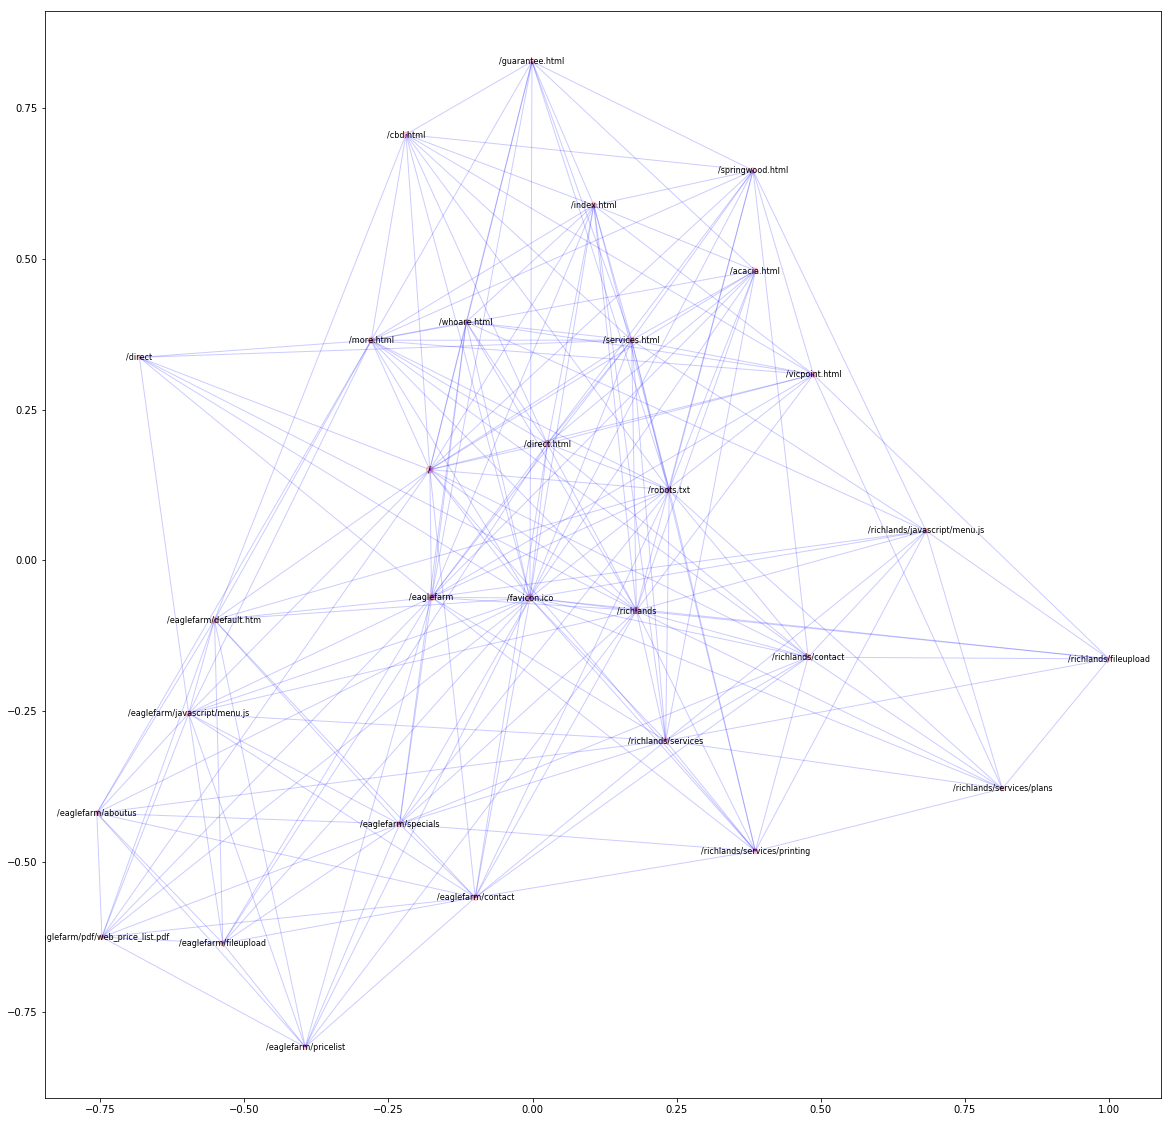

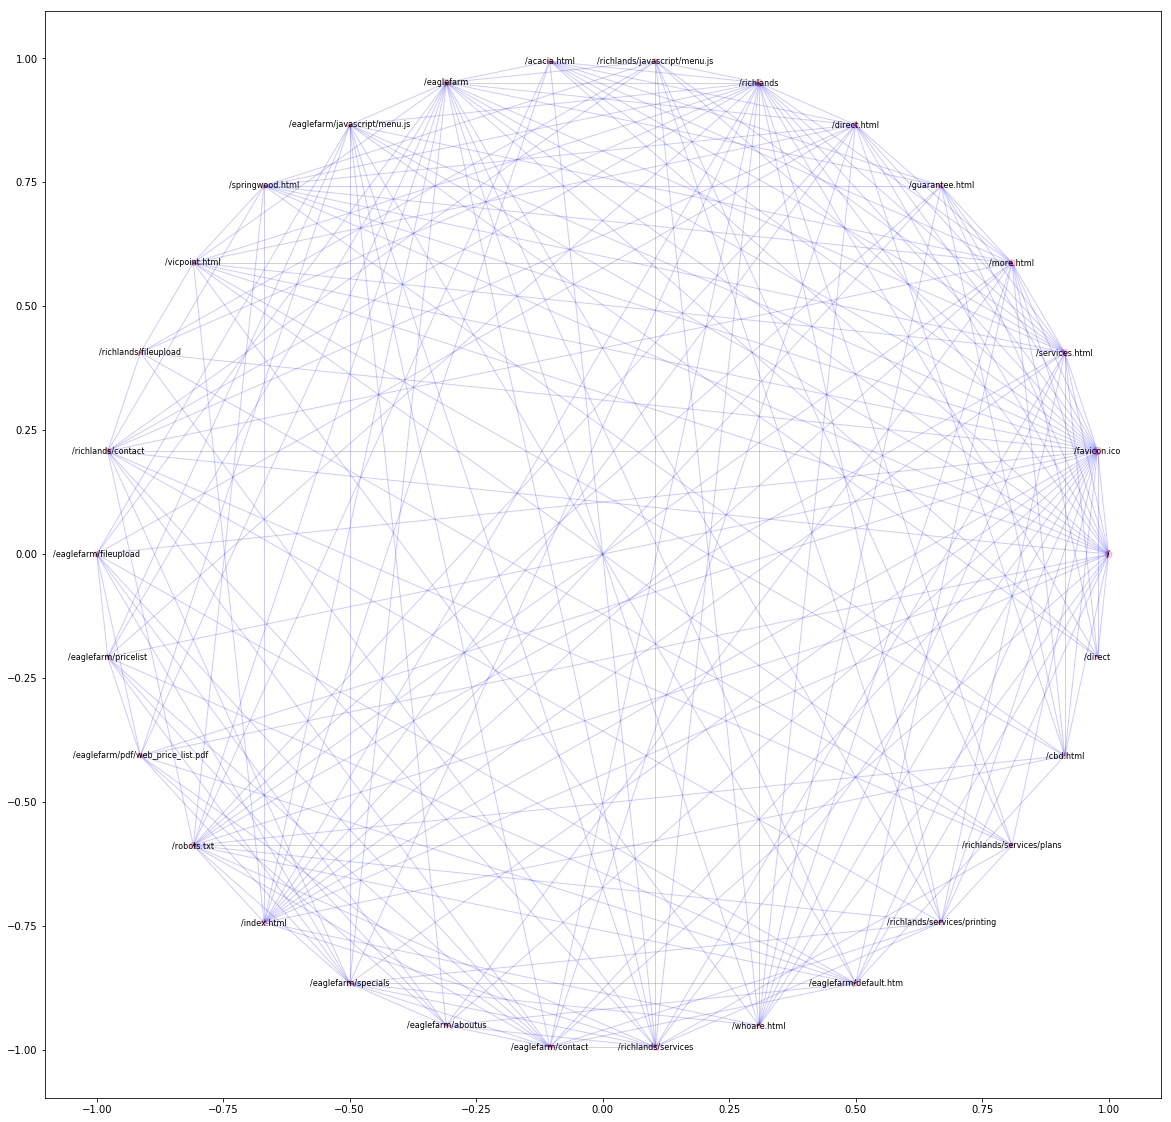

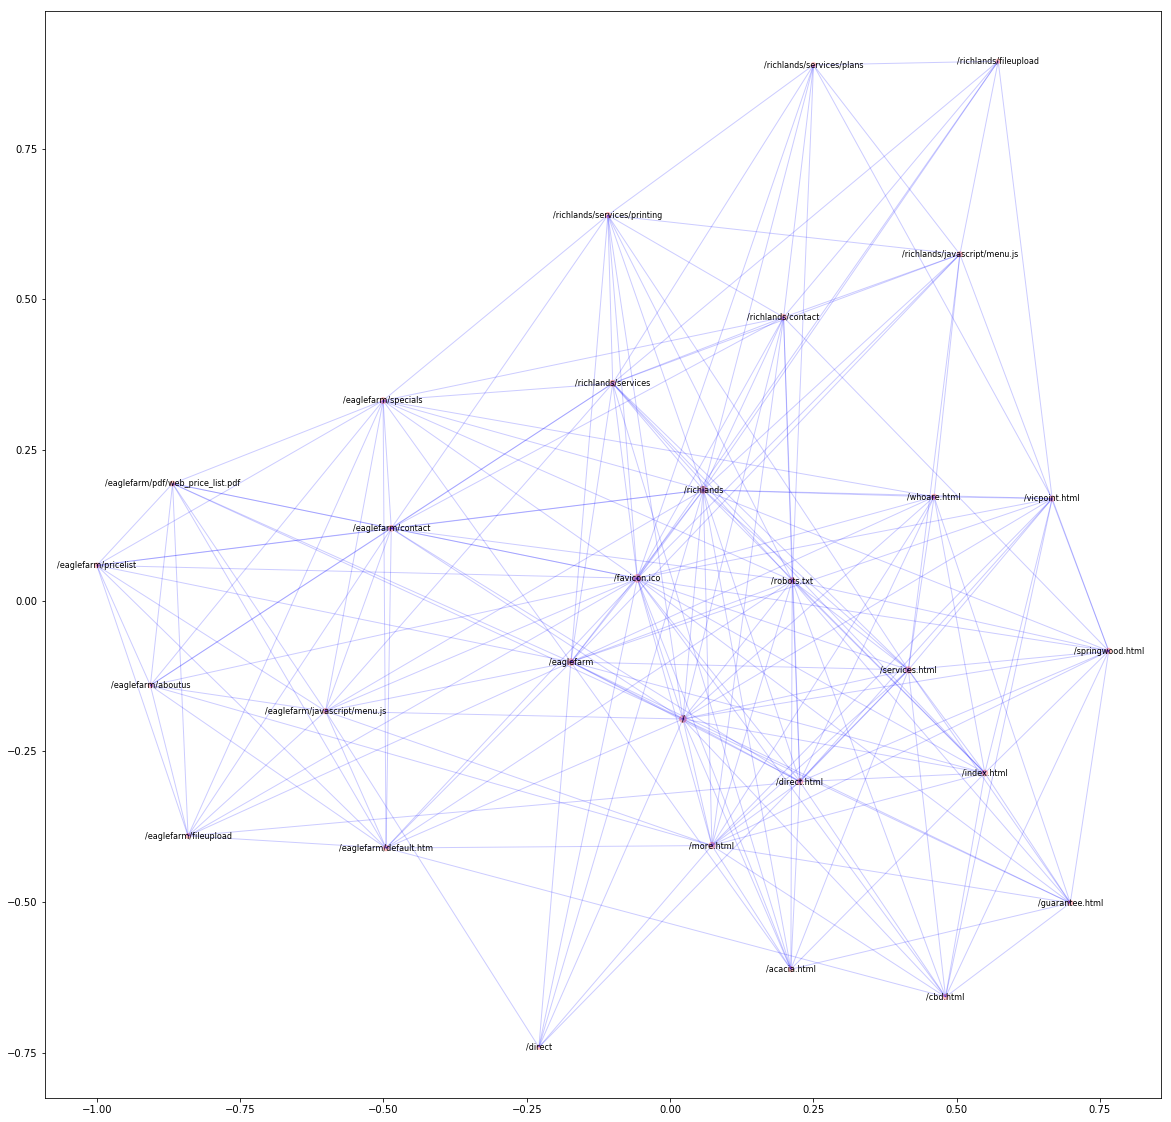

In [73]:
G = buildGraph(web_trim)
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='spring')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='shell')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True)

In [74]:
G = buildGraph(web_trim)
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True,layout='spring')
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True,layout='shell')
# drawGraph(G,nodeLists=['/richlands/'],nSize=2,eAlpha=0.2,labels=True)

generating graph...
Complete. there are 30 nodes and 238 edges in the graph


In [75]:
web_log['request'].value_counts()

/                                                                821
/favicon.ico                                                     554
/robots.txt                                                      395
/eaglefarm                                                       378
/eaglefarm/pricelist                                             376
/eaglefarm/javascript/menu.js                                    370
/eaglefarm/pdf/web_price_list.pdf                                296
/services.html                                                   244
/eaglefarm/contact                                               188
/eaglefarm/specials                                              174
/richlands                                                       169
/more.html                                                       145
/richlands/contact                                               126
/direct.html                                                     107
/eaglefarm/fileupload             

generating graph...
Complete. there are 29 nodes and 217 edges in the graph


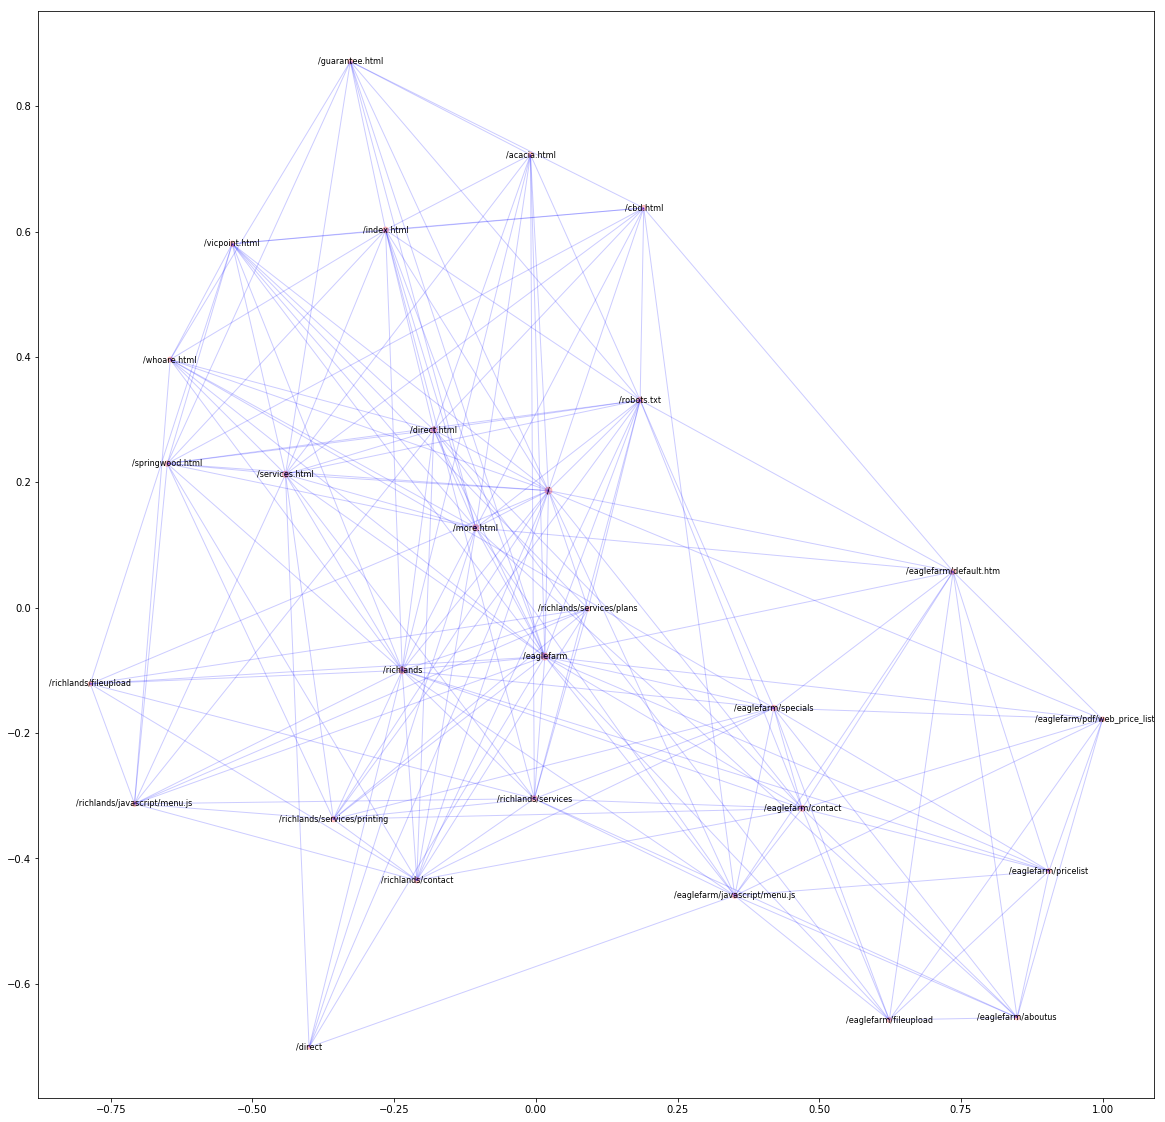

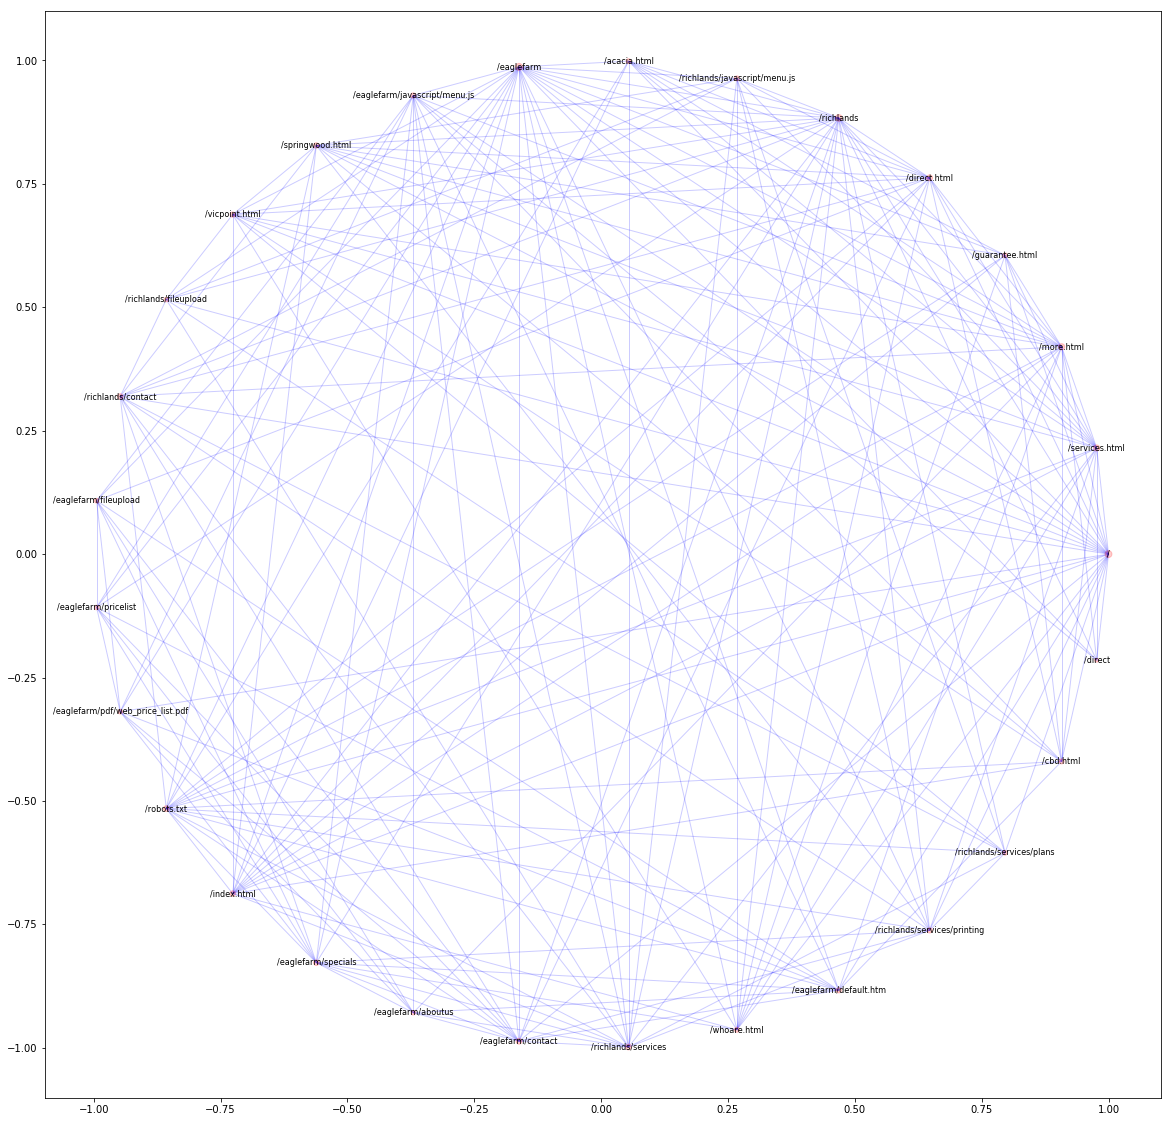

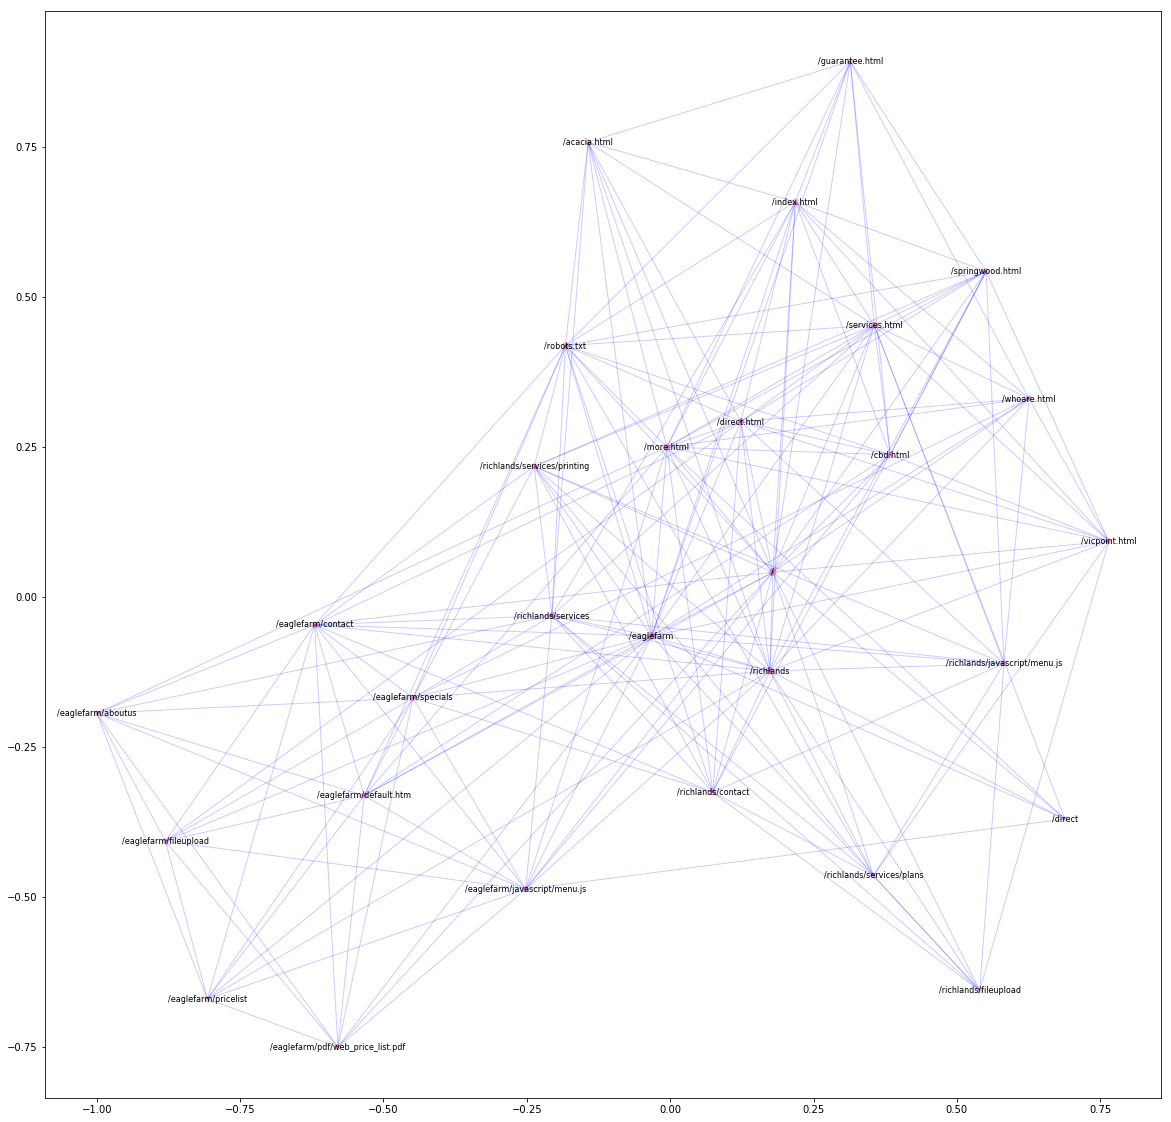

In [76]:
web_trim = web_trim[web_trim['request']!='/favicon.ico']

G = buildGraph(web_trim)
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='spring')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True,layout='shell')
drawGraph(G,nSize=2,eAlpha=0.2,labels=True)

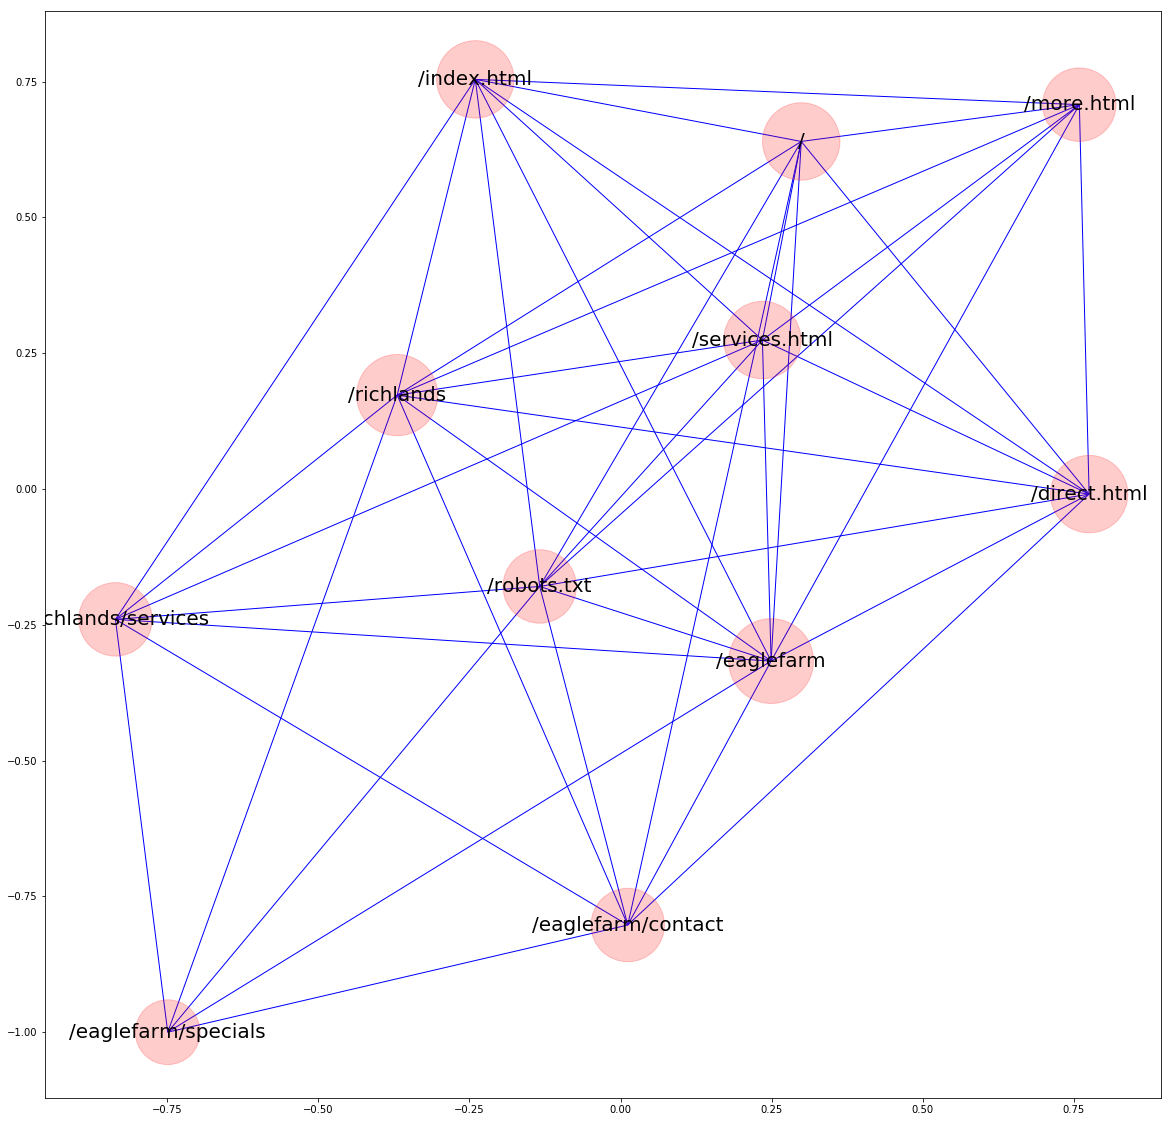

In [77]:
# Import library for centrality analysis
import community

def centrality(G, Nimportant=5, method='degree'):
    """
        returns a subgraph of G with the most important nodes according to the centrality algorithm chosen
    """
    
    if method == 'eigenvector':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method == 'degree':
        dn = nx.degree(G)
        degs = [dn[u] for u, i in dn]; degs.sort(); degs = degs[::-1]; degs = degs[:Nimportant]
        important_nodes = [u for u, i in dn if dn[u] in degs]
        Gt=G.subgraph(important_nodes)
        important_nodes = [(u,dn[u]) for u,i in dn if dn[u] in degs]
    else:
        phi = (1+math.sqrt(5))/2.0 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    if method != 'degree':
        important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1][0:Nimportant]
        dnodes=[n[0] for n in important_nodes]
        Gt = G.subgraph(dnodes)
    with open('Centrality_details.txt','w') as f:
        for var in important_nodes:
            f.write('%s\t %.3f\n' %(var[0],var[1]))
    
    return Gt

Gt = centrality(G, Nimportant=10, method='degree')
drawGraph(Gt, labels=True,lSize=20)

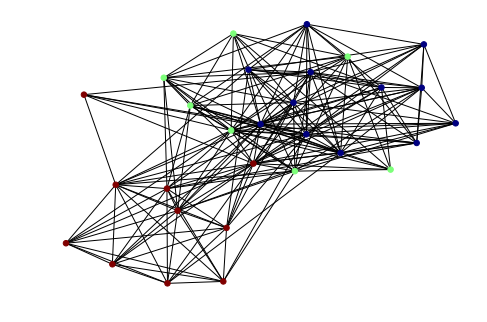

Number of Communities = 3
Network modularity = 0.29


In [78]:
import community
import warnings, numpy as np

''' Find communities in a social media graph G '''
def communities(G):
    # close all plots where possible
    try:
        plt.clf(); plt.cla(); plt.close()
    except:
        pass
    
    # find best partition
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]  # get labels
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
        plt.savefig('Communities.png')
        plt.show()
    
    # measure number of communities and network modularity
    mod, k = community.modularity(part,G), len(set(part.values()))
    print("Number of Communities = %d\nNetwork modularity = %.2f" %(k,mod)) # https://en.wikipedia.org/wiki/Modularity_%28networks%29
    
    # get members of each partition
    part_members, part_len, dCommunity = {}, {}, []
    for usr,par in part.items():
        if par not in part_members.keys():
            part_members[par]=[usr]; part_len[par]=1
        else:
            part_members[par]=part_members[par]+[usr]; part_len[par]+=1
    
    # save community details into text file
    with open('Community_details.txt','w') as f:
        for com in part_len:
            dCommunity.append((com, part_len[com], set(part_members[com])))
            f.write('community %d\t N=%d\t users= ' %(com,part_len[com]))
            f.write('%s\n' %(' '.join(part_members[com])))
    
    dCommunity.sort(key=lambda tup: tup[1])
    return dCommunity[::-1]

com = communities(G)

### 1. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.